# VkusWill

## Load libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, median_absolute_error
import shap

In [3]:
from catboost import CatBoostRegressor

In [4]:
plt.style.use('dark_background')

In [5]:
# Set the maximum column width to a desired value
pd.set_option('display.max_colwidth', 150)

In [6]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

## Hypotheses

###  hypotheses 1 - не проверена (нет данных о физическом объеме)

Связь между весом заказа и физическим объемом:

Гипотеза: Вес заказа пропорционален его физическому объему.

Тестирование: Провести корреляционный анализ между весом и предполагаемым объемом. Построить модель для оценки объема на основе веса и проверить её точность.

### NO hypotheses 2

Влияние типа курьера на физический объем заказа:

Гипотеза: Объем заказов, доставляемых на велосипеде, отличается от объема заказов, доставляемых на автомобиле.

Тестирование: Сравнить средние объемы заказов для двух типов курьеров и провести статистический тест (например, t-тест) для проверки значимости различий.

### NO hypotheses 3

Оценка объема на основе времени года и дня недели:

Гипотеза: В определенное время года или дня недели объем заказов может быть разным.

Метод: Проанализируйте, как изменяется вес заказа и количество позиций в зависимости от времени года и дня недели. Используйте эти данные для оценки возможных объемов.

Есть ли разница между объемом заказа в разное время дня(Днем заказывают готовую еду в офис, а вечером продукты для риготовления дома)

### NO hypotheses 4

Использование данных о доставке:

Гипотеза: Время и тип доставки могут указывать на объем заказа.

Метод: Проанализируйте время доставки и используемый тип транспорта (авто, велосипед) для оценки объемов. Например, большие заказы могут чаще доставляться автомобилем.

### NO hypotheses 5

Классификация по размеру заказа:

Гипотеза: Заказы можно классифицировать по размерам (маленький, средний, большой), и это может дать представление о физическом объеме.

Метод: Используйте вес и количество позиций для создания классификатора, который будет определять размер заказа. Затем определите объемы для каждой категории.

### NO hypotheses 6

Прямое измерение объема (если возможно):

Гипотеза: Прямое измерение некоторых заказов может помочь в оценке объема для остальных.

Метод: Если есть возможность измерить объем некоторых заказов, используйте эти данные для создания модели, которая будет предсказывать объем для других заказов на основе имеющихся признаков.

### NO hypotheses 7

Использование внешних данных:

Гипотеза: Внешние данные о типах товаров и их объемах могут помочь в оценке объема заказов.

Метод: Используйте данные производителей или информации о стандартных размерах упаковок для оценки объемов на основе типов товаров.

### NO hypotheses 8

Профиль клиента и объем заказа:

Гипотеза: Профили клиентов (например, частота покупок, лояльность) могут быть связаны с объемом заказов.

Метод: Создайте профили клиентов на основе их покупательского поведения и проанализируйте, как это связано с объемом заказов.

### NO hypotheses 9

Влияние температуры на объем:

Гипотеза: Температура в момент заказа или доставки может влиять на объем заказа (например, в жаркую погоду может увеличиться потребление определенных товаров).

Метод: Проанализируйте данные о температуре и объемах заказов в разные периоды времени.

### NO hypotheses 10

Влияние на объем от времени выполнения заказа:

Гипотеза: Объем заказа может зависеть от времени выполнения заказа (например, срочные заказы могут иметь определенные характеристики).
Метод: Проанализируйте объемы заказов в зависимости от времени их выполнения.

Есть разные виды доставки (за 30 минут, за час) и гипотеза что срочные заказы имеют меньший вес и объем

## Data preprocessing

In [7]:
# Specify the path to your Excel file
file_path = 'data/orders_4757.xlsx'

# Read the Excel file into a DataFrame
orders = pd.read_excel(file_path)

In [8]:
file_path = 'data/self_pool_4757.xlsx'

# Read the Excel file into a DataFrame
pool = pd.read_excel(file_path)

### Orders

In [ ]:
orders.head()

In [ ]:
orders['Дата'].unique()

Данные всего за две недели

In [ ]:
orders.info()

### Pool

In [9]:
pool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36560 entries, 0 to 36559
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_pool         36560 non-null  int64         
 1   sort_order      36560 non-null  int64         
 2   id_courier      36560 non-null  int64         
 3   id_job          36560 non-null  int64         
 4   date_start      36560 non-null  datetime64[ns]
 5   date_add        36560 non-null  datetime64[ns]
 6   id_parcel       36560 non-null  int64         
 7   date_delivered  36560 non-null  datetime64[ns]
 8   id_general      36560 non-null  int64         
 9   distance        36560 non-null  float64       
 10  duration        36560 non-null  int64         
 11  shopNo          36560 non-null  int64         
 12  gettype         36560 non-null  int64         
 13  gettype_name    36560 non-null  object        
 14  name_TT         36560 non-null  object        
 15  id

In [10]:
pool.head()

,id_pool,sort_order,id_courier,id_job,date_start,date_add,id_parcel,date_delivered,id_general,distance,duration,shopNo,gettype,gettype_name,name_TT,id_service,name_service
0,46154558,6,1799953518,312682133,2024-06-24 10:06:42.080,2024-06-24 10:25:13.340,308931733,2024-06-24 10:25:13.337,308931733,1.632,236,4757,4,ЗиЗ-01,4757ДС_Ленинградский80,32,Доставка за 1 час
1,46146532,3,1799909155,312635798,2024-06-24 06:03:53.357,2024-06-24 06:14:53.657,308992143,2024-06-24 06:14:53.657,308992143,1.362,308,4757,54,ЗиЗ-06,4757ДС_Ленинградский80,32,Доставка за 1 час
2,46153107,2,1799951221,312661707,2024-06-24 09:33:44.057,2024-06-24 09:36:18.470,308995916,2024-06-24 09:36:18.470,308995916,1.290,481,4757,65,ЗиЗ-11,4757ДС_Ленинградский80,32,Доставка за 1 час
3,46164620,2,1799922610,312731104,2024-06-24 11:56:00.450,2024-06-24 11:55:22.457,308996805,2024-06-24 11:55:22.457,308996805,0.987,157,4757,65,ЗиЗ-11,4757ДС_Ленинградский80,32,Доставка за 1 час
4,46153107,2,1799951221,312661707,2024-06-24 09:33:44.057,2024-06-24 09:36:18.470,308995916,2024-06-24 09:36:18.470,308995916,1.290,481,4757,65,ЗиЗ-11,4757ДС_Ленинградский80,32,Доставка за 1 час


In [11]:
pool.sample(5)

,id_pool,sort_order,id_courier,id_job,date_start,date_add,id_parcel,date_delivered,id_general,distance,duration,shopNo,gettype,gettype_name,name_TT,id_service,name_service
387,46151697,5,1799898422,312662686,2024-06-24 09:30:41.797,2024-06-24 09:36:46.130,309223243,2024-06-24 09:36:46.130,309223243,1.202,289,4757,50,ЗиЗ-04,4757ДС_Ленинградский80,32,Доставка за 1 час
4311,46249468,4,1799898422,313152427,2024-06-25 14:23:05.027,2024-06-25 14:27:59.527,309741819,2024-06-25 14:27:59.523,309741819,1.521,216,4757,50,ЗиЗ-04,4757ДС_Ленинградский80,32,Доставка за 1 час
11489,46432954,1,1799947346,314002858,2024-06-28 07:49:33.717,2024-06-28 07:56:04.787,310670642,2024-06-28 07:56:04.783,310670642,3.012,278,4757,62,ЗиЗ-10,4757ДС_Ленинградский80,32,Доставка за 1 час
25981,46832656,4,1799922607,315943808,2024-07-03 17:34:49.267,2024-07-03 17:36:17.060,312731100,2024-07-03 17:36:17.057,312731100,0.608,142,4757,65,ЗиЗ-11,4757ДС_Ленинградский80,32,Доставка за 1 час
14319,46503344,2,1799951221,314330243,2024-06-29 08:47:58.513,2024-06-29 08:52:47.983,311019151,2024-06-29 08:52:47.980,311019151,0.519,96,4757,65,ЗиЗ-11,4757ДС_Ленинградский80,32,Доставка за 1 час


In [12]:
pool[pool['id_general'] == 312210603]

,id_pool,sort_order,id_courier,id_job,date_start,date_add,id_parcel,date_delivered,id_general,distance,duration,shopNo,gettype,gettype_name,name_TT,id_service,name_service
22638,46734703,6,1699873718,315458613,2024-07-02 13:18:35.227,2024-07-02 13:22:15.313,312210603,2024-07-02 13:22:15.313,312210603,0.566,68,4757,54,ЗиЗ-06,4757ДС_Ленинградский80,32,Доставка за 1 час


In [13]:
orders[orders['id_general'] == 312210603]

,Дата,час_оформления,Дата_поставки,ТТ,Тип_заказа,Подтип,Подтип_исх,Сервис,Тип сервиса,id_order,Статус,Строк_в_заказе,Позиций_в_заказе,Позиций_в_заказе_весовых,Оформлен,Печать_заказа_к_сбору,Готов,Доставка,Успешно_завершен,ID_курьера,Время_взятия_на_сборку,Время_сборки,Время_сборки_общ,Время_взятия_в_доставку,Время_доставки,Время_доставки_общ,Время_доставки_посл_сл,Время опоздания в мин,Время_заказа,ShopNo,Строк_собрано,Вес_заказа,Вес_заказа_по_id_general,id_parcel,Ячейка,Время_доставки_от,Время_доставки_до,Выбран_слот,id_general_new,Отменил заказ,Номер исходного заказа,id_general,suborder,Партнер,Тип_партнера,Номер_ПСЕ,Адрес_ПСЕ,Тип курьера
21375,2024-07-02,12,2024-07-02,4757ДС_Ленинградский80,Даркстор,ЗиЗ-06,ЗиЗ-06,Доставка за 1 час,ГОРОД,312210603,Успешно завершен,2,2,0,2024-07-02 12:34:01.903,2024-07-02 12:36:15.813,2024-07-02 12:40:55.410,2024-07-02 12:42:47.610,2024-07-02 13:22:15.317,1.699874e+09,2.0,0.0,2.0,2.0,40.0,42.0,40.0,0,44.0,4757,3,0.343,0.343,NaN,CO-2-2,12:34,13:34,Нет,NaN,NaN,NaN,312210603,1,NaN,NaN,NaN,NaN,Авто


In [14]:
len(pool)

36560

## EDA

Есть ли информация о заказах когда курьер не смог забрать заказ из-за больщого объема или веса?

### Orders

In [15]:
orders

,Дата,час_оформления,Дата_поставки,ТТ,Тип_заказа,Подтип,Подтип_исх,Сервис,Тип сервиса,id_order,Статус,Строк_в_заказе,Позиций_в_заказе,Позиций_в_заказе_весовых,Оформлен,Печать_заказа_к_сбору,Готов,Доставка,Успешно_завершен,ID_курьера,Время_взятия_на_сборку,Время_сборки,Время_сборки_общ,Время_взятия_в_доставку,Время_доставки,Время_доставки_общ,Время_доставки_посл_сл,Время опоздания в мин,Время_заказа,ShopNo,Строк_собрано,Вес_заказа,Вес_заказа_по_id_general,id_parcel,Ячейка,Время_доставки_от,Время_доставки_до,Выбран_слот,id_general_new,Отменил заказ,Номер исходного заказа,id_general,suborder,Партнер,Тип_партнера,Номер_ПСЕ,Адрес_ПСЕ,Тип курьера
0,2024-06-24,0,2024-06-24,4757ДС_Ленинградский80,Даркстор,ЗиЗ-14,ЗиЗ-14,Доставка сейчас,ГОРОД,309186503,Успешно завершен,4,4,1,2024-06-24 00:01:39.340,2024-06-24 03:12:47.207,2024-06-24 03:14:23.863,2024-06-24 07:31:30.463,2024-06-24 07:57:50.660,1.799944e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3,0.0,4757,5,2.921,2.921,NaN,CZ-2-5;CO-6-3,08:00,10:00,Да,NaN,NaN,NaN,309186503,1,NaN,NaN,NaN,NaN,Вело Свой
1,2024-06-24,0,2024-06-24,4757ДС_Ленинградский80,Даркстор,ЗиЗ-05,ЗиЗ-05,Доставка за 1 час,ГОРОД,309186723,Успешно завершен,3,3,0,2024-06-24 00:04:08.853,2024-06-24 00:05:24.137,2024-06-24 00:11:04.170,2024-06-24 00:47:24.540,2024-06-24 01:00:43.717,1.799922e+09,1.0,6.0,7.0,36.0,13.0,49.0,13.0,0,56.0,4757,3,0.560,0.560,NaN,CZ-2-3;CO-2-2,00:04,01:04,Нет,NaN,NaN,NaN,309186723,1,NaN,NaN,NaN,NaN,Ночной Вело Курьер
2,2024-06-24,0,2024-06-24,4757ДС_Ленинградский80,Даркстор,ЗиЗ-05,ЗиЗ-05,Доставка за 1 час,ГОРОД,309187220,Успешно завершен,4,4,0,2024-06-24 00:09:39.003,2024-06-24 06:15:53.963,2024-06-24 06:19:18.333,2024-06-24 09:39:00.740,2024-06-24 09:58:46.967,1.799953e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,0.0,4757,5,1.333,1.333,NaN,CO-5-3,10:00,11:00,Да,NaN,NaN,NaN,309187220,1,NaN,NaN,NaN,NaN,Авто
3,2024-06-24,0,2024-06-24,4757ДС_Ленинградский80,Даркстор,ЗиЗ-15,ЗиЗ-15,Доставка за 30 минут,ГОРОД,309187221,Успешно завершен,3,3,0,2024-06-24 00:09:38.990,2024-06-24 02:51:26.570,2024-06-24 02:53:10.623,2024-06-24 08:16:12.420,2024-06-24 08:23:22.293,1.699889e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7,0.0,4757,4,5.623,5.623,NaN,CO-2-1,08:30,09:00,Нет,NaN,NaN,NaN,309187221,1,NaN,NaN,NaN,NaN,Авто
4,2024-06-24,0,2024-06-24,4757ДС_Ленинградский80,Даркстор,ЗиЗ-14,ЗиЗ-14,Доставка сейчас,ГОРОД,309187336,Успешно завершен,6,6,0,2024-06-24 00:10:59.707,2024-06-24 06:16:19.940,2024-06-24 06:18:44.893,2024-06-24 09:33:55.840,2024-06-24 10:25:15.093,1.799953e+09,NaN,NaN,NaN,NaN,25.0,NaN,25.0,0,25.0,4757,7,2.233,2.233,NaN,CO-3-2,10:00,11:00,Да,NaN,NaN,NaN,309187336,1,NaN,NaN,NaN,NaN,Авто
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37906,2024-07-06,14,2024-07-06,4757ДС_Ленинградский80,Даркстор,ЗиЗ-06,ЗиЗ-06,Доставка за 1 час,ГОРОД,313791631,Успешно завершен,14,14,1,2024-07-06 14:14:57.823,2024-07-06 14:24:57.770,2024-07-06 14:39:36.660,2024-07-06 14:42:53.037,2024-07-06 15:08:32.170,1.799910e+09,10.0,15.0,25.0,3.0,26.0,29.0,26.0,0,54.0,4757,15,7.183,7.183,NaN,CO-2-4;CZ-2-3,14:14,15:14,Нет,NaN,NaN,NaN,313791631,1,NaN,NaN,NaN,NaN,Вело
37907,2024-06-29,8,2024-06-29,4757ДС_Ленинградский80,Даркстор,ЗиЗ-01,ЗиЗ-01,Доставка за 1 час,ГОРОД,311020385,Успешно завершен,1,1,0,2024-06-29 08:11:13.520,2024-06-29 08:12:04.113,2024-06-29 08:13:17.137,2024-06-29 08:14:25.883,2024-06-29 08:23:48.480,1.699945e+09,1.0,1.0,2.0,1.0,9.0,10.0,9.0,0,12.0,4757,2,0.503,0.503,NaN,CO-1-3,08:11,09:11,Нет,NaN,NaN,NaN,311020385,1,NaN,NaN,NaN,NaN,Ночной Вело Курьер
37908,2024-07-04,11,2024-07-04,4757ДС_Ленинградский80,Даркстор,ЗиЗ-14,ЗиЗ-14,Доставка сейчас,ГОРОД,313016436,Успешно завершен,11,11,4,2024-07-04 11:10:53.647,2024-07-04 11:14:58.137,2024-07-04 11:20:05.093,2024-07-04 11:23:00.660,2024-07-04 12:50:21.643,1.799953e+09,4.0,6.0,10.0,3.0,87.0,90.0,87.0,0,100.0,4757,12,6.276,6.276,NaN,CO-3-3,11:10,13:10,Нет,NaN,NaN,Na

In [16]:
 o = orders[orders['Доставка'] - orders['Готов'] > '0 days 01:00:00.00']

In [17]:
oo = o[o['Выбран_слот'] =='Нет']

In [18]:
ow = oo[(oo['час_оформления'] > 6)]

In [19]:
ow[ow['Вес_заказа'] <5]

,Дата,час_оформления,Дата_поставки,ТТ,Тип_заказа,Подтип,Подтип_исх,Сервис,Тип сервиса,id_order,Статус,Строк_в_заказе,Позиций_в_заказе,Позиций_в_заказе_весовых,Оформлен,Печать_заказа_к_сбору,Готов,Доставка,Успешно_завершен,ID_курьера,Время_взятия_на_сборку,Время_сборки,Время_сборки_общ,Время_взятия_в_доставку,Время_доставки,Время_доставки_общ,Время_доставки_посл_сл,Время опоздания в мин,Время_заказа,ShopNo,Строк_собрано,Вес_заказа,Вес_заказа_по_id_general,id_parcel,Ячейка,Время_доставки_от,Время_доставки_до,Выбран_слот,id_general_new,Отменил заказ,Номер исходного заказа,id_general,suborder,Партнер,Тип_партнера,Номер_ПСЕ,Адрес_ПСЕ,Тип курьера
200,2024-06-24,7,2024-06-24,4757ДС_Ленинградский80,Даркстор,ЗиЗ-14,ЗиЗ-14,Доставка сейчас,ГОРОД,309211529,Успешно завершен,7,7,0,2024-06-24 07:39:50.897,2024-06-24 07:40:59.623,2024-06-24 07:43:01.833,2024-06-24 09:20:06.480,2024-06-24 09:54:39.987,1.799951e+09,NaN,NaN,NaN,33.0,34.0,67.0,34.0,0,67.0,4757,8,1.603,2.276,NaN,CO-3-3,08:47,10:47,Нет,NaN,NaN,NaN,309211529,1,NaN,NaN,NaN,NaN,Авто
267,2024-06-24,8,2024-06-24,4757ДС_Ленинградский80,Даркстор,ЗиЗ-04,ЗиЗ-04,Доставка за 1 час,ГОРОД,309221211,Успешно завершен,3,3,0,2024-06-24 08:26:01.220,2024-06-24 08:26:49.847,2024-06-24 08:27:57.540,2024-06-24 09:38:13.230,2024-06-24 10:02:08.680,1.699889e+09,0.0,1.0,1.0,8.0,87.0,95.0,87.0,36,96.0,4757,4,3.543,3.543,NaN,CO-2-3;CZ-2-3,08:26,09:26,Нет,NaN,NaN,NaN,309221211,1,NaN,NaN,NaN,NaN,Ночной Вело Курьер
952,2024-06-24,11,2024-06-24,4757ДС_Ленинградский80,Даркстор,ЗиЗ-01,ЗиЗ-01,Доставка за 1 час,ГОРОД,309302790,Успешно завершен,4,4,0,2024-06-24 11:55:33.123,2024-06-24 11:59:35.730,2024-06-24 12:01:55.600,2024-06-24 13:19:32.307,2024-06-24 14:03:36.860,1.799953e+09,4.0,2.0,6.0,2.0,120.0,122.0,120.0,68,128.0,4757,5,1.923,1.923,NaN,CO-1-1,11:55,12:55,Нет,NaN,NaN,NaN,309302790,1,NaN,NaN,NaN,NaN,Авто
1495,2024-06-24,14,2024-06-24,4757ДС_Ленинградский80,Даркстор,ЗиЗ-06,ЗиЗ-06,Доставка за 1 час,ГОРОД,309367771,Успешно завершен,7,7,4,2024-06-24 14:44:47.813,2024-06-24 14:50:18.120,2024-06-24 14:58:54.360,2024-06-24 18:26:22.297,2024-06-24 19:14:16.377,1.699874e+09,NaN,NaN,NaN,7.0,48.0,55.0,48.0,0,55.0,4757,7,2.441,2.441,NaN,CZ-2-1;CO-6-3,18:19,19:19,Нет,NaN,NaN,NaN,309367771,1,NaN,NaN,NaN,NaN,Авто
1575,2024-06-24,15,2024-06-24,4757ДС_Ленинградский80,Даркстор,ЗиЗ-15,ЗиЗ-15,Доставка за 30 минут,ГОРОД,309378427,Успешно завершен,3,3,2,2024-06-24 15:17:01.297,2024-06-24 15:17:47.220,2024-06-24 15:26:00.767,2024-06-24 19:15:54.707,2024-06-24 19:26:11.443,1.799953e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4,0.0,4757,4,3.899,4.421,NaN,CO-2-2,19:30,20:00,Нет,NaN,NaN,NaN,309378427,1,NaN,NaN,NaN,NaN,Авто
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37097,2024-07-05,7,2024-07-05,4757ДС_Ленинградский80,Даркстор,ЗиЗ-15,ЗиЗ-15,Доставка за 30 минут,ГОРОД,313283483,Успешно завершен,4,4,0,2024-07-05 07:01:42.153,2024-07-05 07:10:00.107,2024-07-05 07:11:04.183,2024-07-05 09:26:04.230,2024-07-05 09:44:20.003,1.799910e+09,NaN,NaN,NaN,NaN,14.0,NaN,14.0,0,14.0,4757,5,2.353,2.353,NaN,CO-6-4,09:30,10:00,Нет,NaN,NaN,NaN,313283483,1,NaN,NaN,NaN,NaN,Вело
37200,2024-07-05,9,2024-07-05,4757ДС_Ленинградский80,Даркстор,ЗиЗ-07,ЗиЗ-07,Доставка за 1 час,ГОРОД,313328684,Успешно завершен,3,3,0,2024-07-05 09:38:55.453,2024-07-05 09:48:11.970,2024-07-05 09:48:59.380,2024-07-05 11:27:21.867,2024-07-05 12:15:15.597,1.799954e+09,10.0,0.0,10.0,3.0,144.0,147.0,144.0,97,157.0,4757,4,1.053,1.053,NaN,CO-1-3,09:38,10:38,Нет,NaN,NaN,NaN,313328684,1,NaN,NaN,NaN,NaN,Авто
37419,2024-07-05,9,2024-07-05,4757ДС_Ленинградский80,Даркстор,ЗиЗ-01,ЗиЗ-01,Доставка за 1 час,ГОРОД,313324101,Отменен,6,6,0,2024-07-05 09:28:15.750,2024-07-05 09:37:31.590,2024-07-05 09:38:51.113,2024-07-05 10:42:27.630,2024-07-05 12:06:37.860,1.799954e+09,9.0,1.0,10.0,3.0,145.0,148.0,145.0,0,NaN,4757,8,4.443,4.443,NaN,CO-1-2,09:28,10:28,Нет,NaN,Седов

In [20]:
o[o['Выбран_слот'] =='Нет']['час_оформления'].value_counts(ascending=True)

час_оформления
0      3
19     3
10     3
20     5
18     5
21     6
15     6
8      8
14     8
13     9
17     9
12     9
1      9
16     9
9     10
7     10
22    10
6     11
2     12
11    12
23    15
3     17
5     18
4     22
Name: count, dtype: int64

#### Weight

In [21]:
orders['Вес_заказа'].describe()

count    37911.000000
mean         3.993308
std          4.713212
min          0.001000
25%          1.081000
50%          2.433000
75%          5.191500
max        125.000000
Name: Вес_заказа, dtype: float64

In [22]:
orders[orders['Вес_заказа'] >120]

,Дата,час_оформления,Дата_поставки,ТТ,Тип_заказа,Подтип,Подтип_исх,Сервис,Тип сервиса,id_order,Статус,Строк_в_заказе,Позиций_в_заказе,Позиций_в_заказе_весовых,Оформлен,Печать_заказа_к_сбору,Готов,Доставка,Успешно_завершен,ID_курьера,Время_взятия_на_сборку,Время_сборки,Время_сборки_общ,Время_взятия_в_доставку,Время_доставки,Время_доставки_общ,Время_доставки_посл_сл,Время опоздания в мин,Время_заказа,ShopNo,Строк_собрано,Вес_заказа,Вес_заказа_по_id_general,id_parcel,Ячейка,Время_доставки_от,Время_доставки_до,Выбран_слот,id_general_new,Отменил заказ,Номер исходного заказа,id_general,suborder,Партнер,Тип_партнера,Номер_ПСЕ,Адрес_ПСЕ,Тип курьера
25685,2024-07-04,9,2024-07-04,4757ДС_Ленинградский80,Даркстор,ЗиЗ-01,ЗиЗ-01,Доставка за 1 час,ГОРОД,312966167,Успешно завершен,1,1,0,2024-07-04 09:15:30.703,2024-07-04 09:15:44.177,2024-07-04 09:20:23.453,2024-07-04 09:22:46.850,2024-07-04 09:45:58.813,1.799954e+09,0.0,5.0,5.0,2.0,23.0,25.0,23.0,0,30.0,4757,1,125.0,125.0,NaN,CO-4-1,09:15,10:15,Нет,NaN,NaN,NaN,312966167,1,NaN,NaN,NaN,NaN,Авто


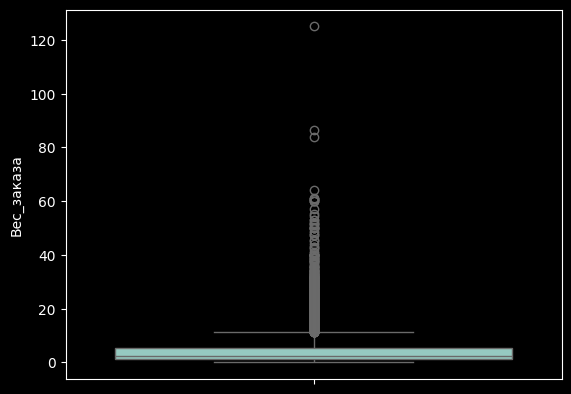

In [23]:
sns.boxplot(orders['Вес_заказа']);

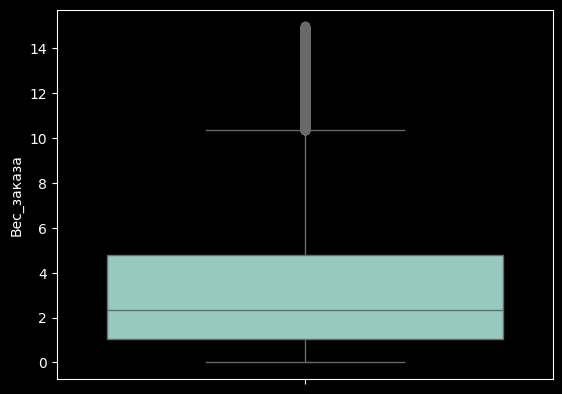

In [24]:
sns.boxplot(orders[orders['Вес_заказа'] < 15]['Вес_заказа']);

In [25]:
pd.cut(orders['Вес_заказа'], 4).value_counts()

Вес_заказа
(-0.124, 31.251]    37816
(31.251, 62.5]         91
(62.5, 93.75]           3
(93.75, 125.0]          1
Name: count, dtype: int64

<Axes: >

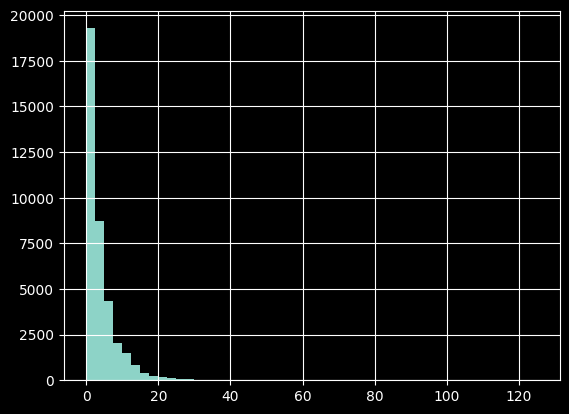

In [26]:
orders['Вес_заказа'].hist(bins=50)

##### weight more 15

In [27]:
orders_more_15 = orders[orders['Вес_заказа'] >= 15]

In [28]:
orders_more_15.sample(5)

,Дата,час_оформления,Дата_поставки,ТТ,Тип_заказа,Подтип,Подтип_исх,Сервис,Тип сервиса,id_order,Статус,Строк_в_заказе,Позиций_в_заказе,Позиций_в_заказе_весовых,Оформлен,Печать_заказа_к_сбору,Готов,Доставка,Успешно_завершен,ID_курьера,Время_взятия_на_сборку,Время_сборки,Время_сборки_общ,Время_взятия_в_доставку,Время_доставки,Время_доставки_общ,Время_доставки_посл_сл,Время опоздания в мин,Время_заказа,ShopNo,Строк_собрано,Вес_заказа,Вес_заказа_по_id_general,id_parcel,Ячейка,Время_доставки_от,Время_доставки_до,Выбран_слот,id_general_new,Отменил заказ,Номер исходного заказа,id_general,suborder,Партнер,Тип_партнера,Номер_ПСЕ,Адрес_ПСЕ,Тип курьера
19375,2024-07-01,15,2024-07-01,4757ДС_Ленинградский80,Даркстор,ЗиЗ-01,ЗиЗ-01,Доставка за 1 час,ГОРОД,311862060,Успешно завершен,21,21,4,2024-07-01 15:47:53.360,2024-07-01 15:48:31.363,2024-07-01 16:01:46.543,2024-07-01 16:08:19.750,2024-07-01 17:10:56.093,1.799954e+09,1.0,13.0,14.0,7.0,62.0,69.0,62.0,23,83.0,4757,22,21.205,21.205,NaN,C-1-3;CO-1-2,15:47,16:47,Нет,NaN,NaN,NaN,311862060,1,NaN,NaN,NaN,NaN,Авто
21116,2024-07-02,11,2024-07-02,4757ДС_Ленинградский80,Даркстор,ЗиЗ-06,ЗиЗ-06,Доставка за 1 час,ГОРОД,312173353,Успешно завершен,7,7,1,2024-07-02 11:08:55.540,2024-07-02 11:09:19.157,2024-07-02 11:13:05.383,2024-07-02 11:18:10.013,2024-07-02 11:58:49.583,1.799949e+09,1.0,4.0,5.0,5.0,40.0,45.0,40.0,0,50.0,4757,8,20.371,20.371,NaN,CO-2-1,11:08,12:08,Нет,NaN,NaN,NaN,312173353,1,NaN,NaN,NaN,NaN,Авто
21383,2024-07-02,12,2024-07-02,4757ДС_Ленинградский80,Даркстор,ЗиЗ-01,ЗиЗ-01,Доставка за 1 час,ГОРОД,312212698,Успешно завершен,6,6,1,2024-07-02 12:38:59.400,2024-07-02 12:39:30.077,2024-07-02 12:44:08.947,2024-07-02 12:47:26.343,2024-07-02 13:13:09.920,1.799954e+09,1.0,4.0,5.0,3.0,26.0,29.0,26.0,0,34.0,4757,7,18.508,18.508,NaN,CO-1-2;C-1-4,12:38,13:38,Нет,NaN,NaN,NaN,312212698,1,NaN,NaN,NaN,NaN,Авто
8205,2024-06-27,7,2024-06-27,4757ДС_Ленинградский80,Даркстор,ЗиЗ-04,ЗиЗ-04,Доставка за 1 час,ГОРОД,310286194,Успешно завершен,3,3,1,2024-06-27 07:17:17.407,2024-06-27 07:18:26.207,2024-06-27 07:19:54.897,2024-06-27 07:23:39.763,2024-06-27 07:46:36.700,1.799953e+09,1.0,1.0,2.0,4.0,23.0,27.0,23.0,0,29.0,4757,4,30.223,30.223,NaN,CO-1-2,07:17,08:17,Нет,NaN,NaN,NaN,310286194,1,NaN,NaN,NaN,NaN,Авто
11115,2024-06-28,9,2024-06-28,4757ДС_Ленинградский80,Даркстор,ЗиЗ-10,ЗиЗ-10,Доставка за 1 час,ГОРОД,310711755,Успешно завершен,28,28,4,2024-06-28 09:32:13.870,2024-06-28 09:33:05.903,2024-06-28 09:46:19.503,2024-06-28 09:54:11.370,2024-06-28 10:15:09.250,1.799907e+09,1.0,13.0,14.0,8.0,21.0,29.0,21.0,0,43.0,4757,30,16.142,16.142,NaN,CO-5-2;CZ-2-3,09:32,10:32,Нет,NaN,NaN,NaN,310711755,1,NaN,NaN,NaN,NaN,Авто


In [29]:
orders_more_15['Тип курьера'].value_counts()

Тип курьера
Авто                     771
Вело                     201
Вело Свой                149
Ночной Вело Курьер        42
Мобильный Авто Курьер      4
Name: count, dtype: int64

In [30]:
orders_more_15.groupby('Тип курьера')['Вес_заказа'].median()

Тип курьера
Авто                     18.853
Вело                     20.000
Вело Свой                19.552
Мобильный Авто Курьер    19.831
Ночной Вело Курьер       20.000
Name: Вес_заказа, dtype: float64

In [31]:
len(orders_more_15) / len(orders)

0.03170583735591253

In [32]:
len(orders_more_15[orders_more_15['Тип курьера'] != 'Авто']) / len(orders_more_15)

0.35856905158069885

#### Courier type

In [33]:
orders.groupby('Тип курьера')['Вес_заказа'].agg(['count', 'mean', 'median'])

,count,mean,median
Тип курьера,,,
Авто,24462,3.995747,2.453
Вело,5116,4.113986,2.418
Вело Свой,4743,4.098108,2.533
Мобильный Авто Курьер,186,2.950548,1.733
Ночной Вело Курьер,1595,3.930426,2.363


In [34]:
5116 + 4743 + 1595

11454

#### Service

In [35]:
orders['Сервис'].value_counts()

Сервис
Доставка за 1 час                                     30719
Доставка сейчас                                        4635
Доставка за 30 минут                                   1616
Экспресс доставка                                       671
ВкусВильчик                                             180
Экспресс за 15 минут                                     90
Name: count, dtype: int64

In [36]:
orders.groupby("Сервис")['Вес_заказа'].agg(['count', 'mean', 'median']).sort_values(by='count', ascending=False)

,count,mean,median
Сервис,,,
Доставка за 1 час,30719,3.982451,2.4180
Доставка сейчас,4635,4.266079,2.6980
Доставка за 30 минут,1616,3.226692,1.7055
Экспресс доставка,671,4.157274,2.7890
ВкусВильчик,180,5.155539,3.1530
Экспресс за 15 минут,90,3.869556,2.0690


#### Ordering time

In [37]:
orders.groupby('час_оформления')['Вес_заказа'].agg(['count', 'mean', 'median']).sort_values(by='median', ascending=False)

,count,mean,median
час_оформления,,,
18,2194,4.426311,2.8170
20,2060,4.178601,2.6830
14,2374,4.018644,2.6525
17,2205,4.085029,2.6430
16,2075,4.147009,2.6210
19,2160,4.081722,2.5740
15,2197,3.928623,2.5030
22,924,4.285554,2.4930
13,2713,4.067531,2.4130


In [38]:
orders['время_диапазон'] = pd.cut(orders['час_оформления'], bins=4)

In [39]:
orders.groupby('время_диапазон')['Вес_заказа'].median()

/tmp/ipykernel_94111/2775538003.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders.groupby('время_диапазон')['Вес_заказа'].median()


время_диапазон
(-0.023, 5.75]    1.923
(5.75, 11.5]      2.294
(11.5, 17.25]     2.536
(17.25, 23.0]     2.588
Name: Вес_заказа, dtype: float64

#### Items with weight

In [40]:
pd.cut(orders['Позиций_в_заказе_весовых'], 5).value_counts()

Позиций_в_заказе_весовых
(-0.015, 3.0]    36317
(3.0, 6.0]        1400
(6.0, 9.0]         165
(9.0, 12.0]         26
(12.0, 15.0]         3
Name: count, dtype: int64

#### Order type

In [41]:
orders.groupby('Тип_заказа')['Вес_заказа'].agg(['count', 'mean', 'median']).sort_values(by='median', ascending=False)

,count,mean,median
Тип_заказа,,,
Внутренние заказы,180,5.155539,3.153
Заказы сторонней организации,1085,3.954604,2.610
Даркстор,36619,3.990398,2.428
Довозы,27,1.747148,0.563


In [42]:
orders[orders['Тип_заказа'] == 'Довозы']

,Дата,час_оформления,Дата_поставки,ТТ,Тип_заказа,Подтип,Подтип_исх,Сервис,Тип сервиса,id_order,Статус,Строк_в_заказе,Позиций_в_заказе,Позиций_в_заказе_весовых,Оформлен,Печать_заказа_к_сбору,Готов,Доставка,Успешно_завершен,ID_курьера,Время_взятия_на_сборку,Время_сборки,Время_сборки_общ,Время_взятия_в_доставку,Время_доставки,Время_доставки_общ,Время_доставки_посл_сл,Время опоздания в мин,Время_заказа,ShopNo,Строк_собрано,Вес_заказа,Вес_заказа_по_id_general,id_parcel,Ячейка,Время_доставки_от,Время_доставки_до,Выбран_слот,id_general_new,Отменил заказ,Номер исходного заказа,id_general,suborder,Партнер,Тип_партнера,Номер_ПСЕ,Адрес_ПСЕ,Тип курьера,время_диапазон
1056,2024-06-24,12,2024-06-24,4757ДС_Ленинградский80,Довозы,ЗиЗ-12,ЗиЗ-12,Доставка сейчас,ГОРОД,309318086,Успешно завершен,13,13,1,2024-06-24 12:32:05.703,2024-06-24 12:38:14.727,2024-06-24 12:40:08.337,2024-06-24 12:47:43.460,2024-06-24 13:32:20.610,1.699888e+09,13.0,2.0,15.0,7.0,45.0,52.0,45.0,0,67.0,4757,14,4.743,NaN,NaN,CO-6-2,12:25,14:25,Нет,NaN,NaN,309270322.0,309270322,1,NaN,NaN,NaN,NaN,Авто,"(11.5, 17.25]"
1629,2024-06-24,15,2024-06-24,4757ДС_Ленинградский80,Довозы,ЗиЗ-06,ЗиЗ-06,Доставка сейчас,ГОРОД,309383223,Успешно завершен,1,1,1,2024-06-24 15:31:31.303,2024-06-24 15:36:15.753,2024-06-24 15:38:50.253,2024-06-24 15:41:48.310,2024-06-24 16:08:05.980,1.799954e+09,6.0,2.0,8.0,3.0,27.0,30.0,27.0,0,38.0,4757,2,1.053,NaN,NaN,CO-6-3,15:30,16:30,Нет,NaN,NaN,309350649.0,309350649,1,NaN,NaN,NaN,NaN,Авто,"(11.5, 17.25]"
1637,2024-06-24,15,2024-06-24,4757ДС_Ленинградский80,Довозы,ЗиЗ-01,ЗиЗ-01,Доставка сейчас,ГОРОД,309384828,Успешно завершен,1,1,0,2024-06-24 15:36:25.427,2024-06-24 15:42:14.890,2024-06-24 15:48:49.490,2024-06-24 15:51:00.827,2024-06-24 16:48:52.493,1.799954e+09,7.0,2.0,9.0,3.0,57.0,60.0,57.0,0,69.0,4757,2,0.170,NaN,NaN,CZ-2-3,15:35,17:35,Нет,NaN,NaN,309358025.0,309358025,1,NaN,NaN,NaN,NaN,Авто,"(11.5, 17.25]"
1766,2024-06-24,16,2024-06-24,4757ДС_Ленинградский80,Довозы,ЗиЗ-04,ЗиЗ-04,Доставка сейчас,ГОРОД,309399805,Успешно завершен,1,1,0,2024-06-24 16:23:28.433,2024-06-24 16:35:34.200,2024-06-24 16:36:29.260,2024-06-24 16:41:07.197,2024-06-24 17:31:40.220,1.799871e+09,13.0,1.0,14.0,5.0,50.0,55.0,50.0,0,69.0,4757,1,0.040,NaN,NaN,CO-4-2,16:22,18:22,Нет,NaN,NaN,309376422.0,309376422,1,NaN,NaN,NaN,NaN,Вело,"(11.5, 17.25]"
4996,2024-06-25,19,2024-06-25,4757ДС_Ленинградский80,Довозы,ЗиЗ-01,ЗиЗ-01,Доставка сейчас,ГОРОД,309856830,Успешно завершен,13,13,1,2024-06-25 19:35:07.353,2024-06-25 19:50:01.250,2024-06-25 19:59:57.780,2024-06-25 20:03:04.170,2024-06-25 20:28:18.057,1.799953e+09,17.0,9.0,26.0,4.0,25.0,29.0,25.0,0,55.0,4757,14,8.863,NaN,NaN,CZ-2-3;CO-2-2;CO-2-1;C-1-4,19:33,20:33,Нет,NaN,NaN,309708496.0,309708496,1,NaN,NaN,NaN,NaN,Авто,"(17.25, 23.0]"
7501,2024-06-26,18,2024-06-26,4757ДС_Ленинградский80,Довозы,ЗиЗ-11,ЗиЗ-11,Доставка сейчас,ГОРОД,310177185,Успешно завершен,1,1,0,2024-06-26 18:50:05.847,2024-06-26 18:54:02.423,2024-06-26 18:54:50.923,2024-06-26 18:56:09.717,2024-06-26 19:37:35.697,1.799923e+09,5.0,0.0,5.0,2.0,41.0,43.0,41.0,0,48.0,4757,1,0.001,NaN,NaN,CO-2-3,18:49,20:49,Нет,NaN,NaN,310152255.0,310152255,1,NaN,NaN,NaN,NaN,Вело,"(17.25, 23.0]"
8455,2024-06-27,9,2024-06-27,4757ДС_Ленинградский80,Довозы,ЗиЗ-07,ЗиЗ-07,Доставка сейчас,ГОРОД,310372130,Успешно завершен,1,1,0,2024-06-27 09:13:21.513,2024-06-27 09:34:02.707,2024-06-27 09:34:51.843,2024-06-27 09:37:59.800,2024-06-27 10:03:47.597,1.799954e+09,14.0,0.0,14.0,3.0,26.0,29.0,26.0,0,43.0,4757,1,0.700,NaN,NaN,CO-6-4,09:20,11:20,Нет,NaN,NaN,310269321.0,310269321,1,NaN,NaN,NaN,NaN,Авто,"(5.75, 11.5]"
10698,2024-06-28,5,2024-06-28,4757ДС_Ленинградский80,Довозы,ЗиЗ-04,ЗиЗ-04,Доставка сейчас,ГОРОД,310663952,Успешно завершен,2,2,1,2024-06-28 05:24:58.540,2024-06-28 05:31:23.800,2024-06-28 05:33:46.323,2024-06-28 05:37:25.173,2024-06-28 05:55:31.630,1.252243e+09,8.0,2.0,10.0,4.0,18.0,22.0,18.0,0,32.0,4757,2,0.331,NaN,NaN,CO-6-3,05:23,07:23,Нет,NaN,NaN,310265983.0,310243610,1,NaN,NaN,NaN,NaN,Ночной Вело Курьер,"

In [43]:
orders[orders['id_general'] == 309350649]

,Дата,час_оформления,Дата_поставки,ТТ,Тип_заказа,Подтип,Подтип_исх,Сервис,Тип сервиса,id_order,Статус,Строк_в_заказе,Позиций_в_заказе,Позиций_в_заказе_весовых,Оформлен,Печать_заказа_к_сбору,Готов,Доставка,Успешно_завершен,ID_курьера,Время_взятия_на_сборку,Время_сборки,Время_сборки_общ,Время_взятия_в_доставку,Время_доставки,Время_доставки_общ,Время_доставки_посл_сл,Время опоздания в мин,Время_заказа,ShopNo,Строк_собрано,Вес_заказа,Вес_заказа_по_id_general,id_parcel,Ячейка,Время_доставки_от,Время_доставки_до,Выбран_слот,id_general_new,Отменил заказ,Номер исходного заказа,id_general,suborder,Партнер,Тип_партнера,Номер_ПСЕ,Адрес_ПСЕ,Тип курьера,время_диапазон
1358,2024-06-24,13,2024-06-24,4757ДС_Ленинградский80,Даркстор,ЗиЗ-06,ЗиЗ-06,Доставка за 1 час,ГОРОД,309350649,Успешно завершен,12,12,2,2024-06-24 13:56:50.547,2024-06-24 13:58:53.513,2024-06-24 14:09:45.020,2024-06-24 14:26:25.527,2024-06-24 14:50:02.237,1.799953e+09,2.0,6.0,8.0,17.0,24.0,41.0,24.0,0,49.0,4757,18,15.652,16.705,NaN,CO-2-1,13:56,14:56,Нет,NaN,NaN,NaN,309350649,1,NaN,NaN,NaN,NaN,Авто,"(11.5, 17.25]"
1629,2024-06-24,15,2024-06-24,4757ДС_Ленинградский80,Довозы,ЗиЗ-06,ЗиЗ-06,Доставка сейчас,ГОРОД,309383223,Успешно завершен,1,1,1,2024-06-24 15:31:31.303,2024-06-24 15:36:15.753,2024-06-24 15:38:50.253,2024-06-24 15:41:48.310,2024-06-24 16:08:05.980,1.799954e+09,6.0,2.0,8.0,3.0,27.0,30.0,27.0,0,38.0,4757,2,1.053,NaN,NaN,CO-6-3,15:30,16:30,Нет,NaN,NaN,309350649.0,309350649,1,NaN,NaN,NaN,NaN,Авто,"(11.5, 17.25]"


In [44]:
orders[orders['Вес_заказа'] != orders['Вес_заказа_по_id_general']].dropna(subset=['Вес_заказа_по_id_general'])

,Дата,час_оформления,Дата_поставки,ТТ,Тип_заказа,Подтип,Подтип_исх,Сервис,Тип сервиса,id_order,Статус,Строк_в_заказе,Позиций_в_заказе,Позиций_в_заказе_весовых,Оформлен,Печать_заказа_к_сбору,Готов,Доставка,Успешно_завершен,ID_курьера,Время_взятия_на_сборку,Время_сборки,Время_сборки_общ,Время_взятия_в_доставку,Время_доставки,Время_доставки_общ,Время_доставки_посл_сл,Время опоздания в мин,Время_заказа,ShopNo,Строк_собрано,Вес_заказа,Вес_заказа_по_id_general,id_parcel,Ячейка,Время_доставки_от,Время_доставки_до,Выбран_слот,id_general_new,Отменил заказ,Номер исходного заказа,id_general,suborder,Партнер,Тип_партнера,Номер_ПСЕ,Адрес_ПСЕ,Тип курьера,время_диапазон
29,2024-06-24,0,2024-06-24,4757ДС_Ленинградский80,Даркстор,ЗиЗ-04,ЗиЗ-04,Доставка за 1 час,ГОРОД,309191010,Успешно завершен,15,15,0,2024-06-24 00:58:11.267,2024-06-24 03:47:07.070,2024-06-24 03:55:15.123,2024-06-24 07:39:38.110,2024-06-24 08:45:35.010,1.699889e+09,NaN,NaN,NaN,NaN,45.0,NaN,45.0,0,45.0,4757,17,6.281,6.764,NaN,CZ-2-5;CO-5-1,08:00,09:00,Да,NaN,NaN,NaN,309191010,1,NaN,NaN,NaN,NaN,Ночной Вело Курьер,"(-0.023, 5.75]"
30,2024-06-24,1,2024-06-24,4757ДС_Ленинградский80,Даркстор,ЗиЗ-06,ЗиЗ-06,Доставка за 1 час,ГОРОД,309191176,Успешно завершен,2,2,0,2024-06-24 01:00:44.807,2024-06-24 06:19:48.093,2024-06-24 06:22:41.910,2024-06-24 09:56:00.660,2024-06-24 10:14:54.550,1.799949e+09,NaN,NaN,NaN,NaN,14.0,NaN,14.0,0,14.0,4757,3,0.608,0.746,NaN,CO-5-2,10:00,11:00,Да,NaN,NaN,NaN,309191176,1,NaN,NaN,NaN,NaN,Авто,"(-0.023, 5.75]"
37,2024-06-24,1,2024-06-24,4757ДС_Ленинградский80,Даркстор,ЗиЗ-15,ЗиЗ-15,Доставка за 30 минут,ГОРОД,309192072,Успешно завершен,3,3,0,2024-06-24 01:13:35.393,2024-06-24 06:25:51.673,2024-06-24 06:27:32.500,2024-06-24 10:15:32.990,2024-06-24 10:46:08.753,1.799954e+09,NaN,NaN,NaN,NaN,16.0,NaN,16.0,0,16.0,4757,4,1.633,1.936,NaN,CO-6-1,10:30,11:00,Нет,NaN,NaN,NaN,309192072,1,NaN,NaN,NaN,NaN,Авто,"(-0.023, 5.75]"
41,2024-06-24,1,2024-06-24,4757ДС_Ленинградский80,Даркстор,ЗиЗ-05,ЗиЗ-05,Доставка за 1 час,ГОРОД,309192306,Успешно завершен,4,4,0,2024-06-24 01:17:39.143,2024-06-24 02:15:03.500,2024-06-24 02:16:05.367,2024-06-24 08:05:22.490,2024-06-24 08:27:51.307,1.799954e+09,NaN,NaN,NaN,5.0,22.0,27.0,22.0,0,27.0,4757,5,1.613,3.661,NaN,CO-2-3,08:00,09:00,Да,NaN,NaN,NaN,309192306,1,NaN,NaN,NaN,NaN,Авто,"(-0.023, 5.75]"
55,2024-06-24,2,2024-06-24,4757ДС_Ленинградский80,Даркстор,ЗиЗ-01,ЗиЗ-01,Доставка за 1 час,ГОРОД,309194548,Успешно завершен,6,6,1,2024-06-24 02:05:34.400,2024-06-24 06:33:56.510,2024-06-24 06:37:55.280,2024-06-24 11:44:46.243,2024-06-24 12:20:57.240,1.799954e+09,NaN,NaN,NaN,NaN,20.0,NaN,20.0,0,20.0,4757,7,6.929,7.029,NaN,CO-1-4;CO-1-1,12:00,13:00,Да,NaN,NaN,NaN,309194548,1,NaN,NaN,NaN,NaN,Авто,"(-0.023, 5.75]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37736,2024-06-24,19,2024-06-24,4757ДС_Ленинградский80,Даркстор,ЗиЗ-17,ЗиЗ-17,Доставка за 1 час,ГОРОД,309458385,Успешно завершен,5,5,1,2024-06-24 19:21:08.337,2024-06-24 19:29:27.070,2024-06-24 19:31:14.630,2024-06-24 19:32:49.947,2024-06-24 20:34:39.143,1.699872e+09,8.0,2.0,10.0,1.0,62.0,63.0,62.0,13,73.0,4757,6,0.723,1.156,NaN,CO-4-3,19:21,20:21,Нет,NaN,NaN,NaN,309458385,1,NaN,NaN,NaN,NaN,Вело,"(17.25, 23.0]"
37773,2024-06-28,10,2024-06-28,4757ДС_Ленинградский80,Даркстор,ЗиЗ-05,ЗиЗ-05,Доставка за 1 час,ГОРОД,310738571,Успешно завершен,2,2,0,2024-06-28 10:35:57.970,2024-06-28 10:37:06.133,2024-06-28 10:38:17.253,2024-06-28 11:24:58.637,2024-06-28 12:04:02.957,1.799954e+09,2.0,1.0,3.0,46.0,40.0,86.0,40.0,29,89.0,4757,3,0.343,0.553,NaN,CO-4-1,10:35,11:35,Нет,NaN,NaN,NaN,310738571,1,NaN,NaN,NaN,NaN,Авто,"(5.75, 11.5]"
37798,2024-06-30,20,2024-06-30,4757ДС_Ленинградский80,Даркстор,ЗиЗ-04,ЗиЗ-04,Доставка за 1 час,ГОРОД,311612695,Успешно завершен,5,5,0,2024-06-30 20:32:33.633,2024-06-30 20:32:53.700,2024-06-30 20:34:33.817,2024-06-30 20:38:06.063,2024-06-

#### Time picking

как система определяет сколько ячеек займет товар?

In [45]:
orders[orders['Доставка'] - orders['Готов'] > '0 days 01:00:00.00']['Сервис'].value_counts()

Сервис
Доставка за 1 час                                     2335
Доставка сейчас                                        435
Доставка за 30 минут                                   113
ВкусВильчик                                              1
Name: count, dtype: int64

#### Slot

In [46]:
orders['slot_count'] = orders['Ячейка'].str.count(';') + 1

In [47]:
orders['slot_count'].value_counts()

slot_count
1.0    29348
2.0     7028
3.0      495
4.0       19
Name: count, dtype: int64

In [48]:
additional_deliveries = orders[(orders['Тип_заказа'] == 'Довозы')]

In [49]:
add_del = orders[orders['id_general'].isin(additional_deliveries['id_general'])]

In [50]:
add_del[add_del['Тип_заказа'] != 'Довозы']['slot_count'].value_counts()

slot_count
1.0    16
2.0    10
3.0     1
Name: count, dtype: int64

In [51]:
orders.groupby('slot_count')['Вес_заказа'].agg(['count', 'mean', 'median', 'min', 'max']).sort_values(by='median', ascending=False)

,count,mean,median,min,max
slot_count,,,,,
4.0,19,15.099316,13.338,6.417,50.169
3.0,495,9.256869,7.643,0.899,51.469
2.0,7028,5.618982,3.999,0.085,64.006
1.0,29348,3.585297,2.153,0.001,125.000


In [52]:
(495 + 19 ) / len(orders)

0.013558070217087388

In [53]:
orders.groupby('slot_count')['Позиций_в_заказе'].agg(['count', 'mean', 'median', 'min', 'max']).sort_values(by='median', ascending=False)

,count,mean,median,min,max
slot_count,,,,,
4.0,19,16.263158,14.0,5,32
3.0,495,12.393939,11.0,3,69
2.0,7028,8.869806,7.0,1,50
1.0,29348,5.703728,5.0,1,68


In [54]:
orders.groupby('slot_count')['Позиций_в_заказе_весовых'].agg(['count', 'mean', 'median', 'min', 'max']).sort_values(by='median', ascending=False)

,count,mean,median,min,max
slot_count,,,,,
3.0,495,2.335354,2.0,0,15
4.0,19,2.526316,2.0,0,12
2.0,7028,1.175583,1.0,0,12
1.0,29348,0.648324,0.0,0,13


#### Status

In [55]:
orders['Статус'].unique()

array(['Успешно завершен', 'Отменен', 'Вернулся на полки', 'Не выполнен'],
      dtype=object)

##### Canceled

In [56]:
canceled = orders[orders['Статус'] == 'Отменен']

In [57]:
canceled[canceled['Готов'].notna()]['Успешно_завершен'].notna().mean()

0.366412213740458

In [58]:
canceled[canceled['Тип курьера'] == 'Вело Свой']

,Дата,час_оформления,Дата_поставки,ТТ,Тип_заказа,Подтип,Подтип_исх,Сервис,Тип сервиса,id_order,Статус,Строк_в_заказе,Позиций_в_заказе,Позиций_в_заказе_весовых,Оформлен,Печать_заказа_к_сбору,Готов,Доставка,Успешно_завершен,ID_курьера,Время_взятия_на_сборку,Время_сборки,Время_сборки_общ,Время_взятия_в_доставку,Время_доставки,Время_доставки_общ,Время_доставки_посл_сл,Время опоздания в мин,Время_заказа,ShopNo,Строк_собрано,Вес_заказа,Вес_заказа_по_id_general,id_parcel,Ячейка,Время_доставки_от,Время_доставки_до,Выбран_слот,id_general_new,Отменил заказ,Номер исходного заказа,id_general,suborder,Партнер,Тип_партнера,Номер_ПСЕ,Адрес_ПСЕ,Тип курьера,время_диапазон,slot_count
9768,2024-06-27,16,2024-06-27,4757ДС_Ленинградский80,Даркстор,ЗиЗ-11,ЗиЗ-11,Доставка за 1 час,ГОРОД,310539718,Отменен,2,2,0,2024-06-27 16:49:53.970,2024-06-27 16:51:52.670,2024-06-27 16:52:36.897,2024-06-27 16:56:00.023,2024-06-27 18:09:58.990,1.799923e+09,2.0,1.0,3.0,4.0,73.0,77.0,73.0,0,NaN,4757,3,0.373,0.373,NaN,CO-1-2,16:49,17:49,Нет,NaN,Лебедев Владислав Владимирович,NaN,310539718,1,NaN,NaN,NaN,NaN,Вело Свой,"(11.5, 17.25]",1.0
13886,2024-06-29,11,2024-06-29,4757ДС_Ленинградский80,Даркстор,ЗиЗ-14,ЗиЗ-14,Доставка сейчас,ГОРОД,311081661,Отменен,10,10,0,2024-06-29 11:01:43.620,2024-06-29 11:06:45.397,2024-06-29 11:13:32.627,2024-06-29 13:21:03.877,2024-06-29 13:23:24.097,1.799944e+09,NaN,4.0,NaN,19.0,111.0,130.0,111.0,0,NaN,4757,11,4.460,4.713,NaN,CO-3-2,11:09,13:09,Нет,NaN,Бобло Марина Михайловна,NaN,311081661,1,NaN,NaN,NaN,NaN,Вело Свой,"(5.75, 11.5]",1.0
17079,2024-06-30,17,2024-06-30,4757ДС_Ленинградский80,Даркстор,ЗиЗ-10,ЗиЗ-10,Доставка за 1 час,ГОРОД,311556222,Отменен,1,1,0,2024-06-30 17:45:28.930,NaT,NaT,NaT,NaT,1.799947e+09,35.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4757,1,0.100,NaN,NaN,NaN,17:45,18:45,Нет,NaN,Тарасова Дарья Александровна,NaN,311556221,2,ДИАЛОГ ЦЕНТР ООО,Аптека,99132.0,"Москва пр-т Ленинградский , д. 78 к. 1",Вело Свой,"(11.5, 17.25]",NaN
21738,2024-07-02,15,2024-07-02,4757ДС_Ленинградский80,Даркстор,ЗиЗ-06,ЗиЗ-06,Доставка за 1 час,ГОРОД,312267344,Отменен,1,1,0,2024-07-02 15:02:24.910,NaT,NaT,NaT,NaT,1.799943e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4757,1,0.780,NaN,NaN,NaN,15:02,16:02,Нет,312265592.0,Авто,NaN,312265592,2,NaN,NaN,NaN,NaN,Вело Свой,"(11.5, 17.25]",NaN
29662,2024-07-05,17,2024-07-05,4757ДС_Ленинградский80,Даркстор,ЗиЗ-11,ЗиЗ-11,Доставка за 1 час,ГОРОД,313532156,Отменен,6,6,1,2024-07-05 17:45:50.433,2024-07-05 17:46:47.470,2024-07-05 17:54:04.850,NaT,NaT,1.699924e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4757,6,2.300,2.653,NaN,NaN,17:56,18:56,Нет,NaN,Авто,NaN,313532156,1,NaN,NaN,NaN,NaN,Вело Свой,"(11.5, 17.25]",NaN
34622,2024-07-07,22,2024-07-07,4757ДС_Ленинградский80,Даркстор,ЗиЗ-11,ЗиЗ-11,Доставка за 1 час,ГОРОД,314244857,Отменен,6,6,0,2024-07-07 22:11:58.293,2024-07-07 22:25:21.687,2024-07-07 22:29:37.760,2024-07-07 22:30:37.453,2024-07-07 23:58:43.647,1.799923e+09,14.0,4.0,18.0,1.0,88.0,89.0,88.0,0,NaN,4757,7,10.618,10.618,NaN,CO-6-1,22:11,23:11,Нет,NaN,Голубева Дарья Олеговна,NaN,314244857,1,NaN,NaN,NaN,NaN,Вело Свой,"(17.25, 23.0]",1.0
35028,2024-07-06,12,2024-07-06,4757ДС_Ленинградский80,Даркстор,ЗиЗ-16,ЗиЗ-16,Экспресс доставка,Город экспресс,313745270,Отменен,5,5,0,2024-07-06 12:11:11.973,2024-07-06 12:11:51.120,2024-07-06 12:13:39.353,2024-07-06 12:16:24.823,2024-07-06 12:31:18.430,1.799923e+09,0.0,2.0,2.0,3.0,15.0,18.0,15.0,0,NaN,4757,6,1.534,1.534,NaN,CO-2-2,12:11,12:41,Нет,NaN,Кортунова Ирина Владимировна,NaN,313745270,1,NaN,NaN,NaN,NaN,Вело Свой,"(11.5, 17.25]",1.0
35514,2024-06-27,9,2024-06-27,4757ДС_Ленинградский80,Даркстор,ЗиЗ-14,ЗиЗ-14,Доставка сейчас,ГОРОД,310382077,Отменен,1,1,0,2024-06-27 09:38:39.820,2024-06-27 10:09:55.260,2024-06-27 10:10:41.187,2024-06-27 20:32:08.170,2024-06-28 00:15:16.727,1.799951e+09,NaN,NaN,NaN,NaN,195.0,NaN,195.0,0,NaN,4757,2,1.136,1.136,NaN,CO-3-3,21:00,22:00,Да,NaN,Cancelled by full refund,NaN,310382077,1,NaN,NaN,NaN,NaN,Вело Свой,"(5.75, 11.5]",1.0
36004,2024-06-29,10,2024-06-29,4757ДС_Лен

In [59]:
orders[orders['Статус'] == 'Отменен']['Отменил заказ'].value_counts()

Отменил заказ
Авто                             540
Cancelled by full refund          24
Тимофеева Ангелина Валерьевна      7
Агеева Валентина Дмитриевна        5
Евдокимов Андрей Сергеевич         5
                                ... 
Маклаков Кирилл Сергеевич          1
Шипицын Евгений Евгеньевич         1
Галицына Анастасия Алексеевна      1
Полонский Александр Игоревич       1
Лапшина Татьяна Олеговна           1
Name: count, Length: 96, dtype: int64

##### Comeback

In [60]:
orders[orders['Статус'] == 'Вернулся на полки'][orders[orders['Статус'] == 'Вернулся на полки']['Тип курьера'] == 'Вело']

,Дата,час_оформления,Дата_поставки,ТТ,Тип_заказа,Подтип,Подтип_исх,Сервис,Тип сервиса,id_order,Статус,Строк_в_заказе,Позиций_в_заказе,Позиций_в_заказе_весовых,Оформлен,Печать_заказа_к_сбору,Готов,Доставка,Успешно_завершен,ID_курьера,Время_взятия_на_сборку,Время_сборки,Время_сборки_общ,Время_взятия_в_доставку,Время_доставки,Время_доставки_общ,Время_доставки_посл_сл,Время опоздания в мин,Время_заказа,ShopNo,Строк_собрано,Вес_заказа,Вес_заказа_по_id_general,id_parcel,Ячейка,Время_доставки_от,Время_доставки_до,Выбран_слот,id_general_new,Отменил заказ,Номер исходного заказа,id_general,suborder,Партнер,Тип_партнера,Номер_ПСЕ,Адрес_ПСЕ,Тип курьера,время_диапазон,slot_count
4523,2024-06-25,16,2024-06-25,4757ДС_Ленинградский80,Даркстор,ЗиЗ-04,ЗиЗ-04,Доставка за 1 час,ГОРОД,309800006,Вернулся на полки,1,1,0,2024-06-25 16:42:35.820,2024-06-25 16:43:55.537,2024-06-25 16:45:13.580,2024-06-25 16:56:35.367,NaT,1.699872e+09,1.0,2.0,3.0,NaN,NaN,NaN,NaN,0,NaN,4757,2,1.403,NaN,NaN,NaN,16:42,17:42,Нет,309799854.0,NaN,NaN,309799854,2,NaN,NaN,NaN,NaN,Вело,"(11.5, 17.25]",NaN
32241,2024-07-06,21,2024-07-06,4757ДС_Ленинградский80,Даркстор,ЗиЗ-01,ЗиЗ-01,Доставка за 1 час,ГОРОД,313919315,Вернулся на полки,1,1,0,2024-07-06 21:59:28.400,2024-07-06 21:59:49.910,2024-07-06 22:00:12.323,2024-07-06 22:04:15.910,NaT,1.799956e+09,0.0,1.0,1.0,NaN,NaN,NaN,NaN,0,NaN,4757,2,2.003,NaN,NaN,NaN,21:59,22:59,Нет,313918216.0,NaN,NaN,313918216,2,NaN,NaN,NaN,NaN,Вело,"(17.25, 23.0]",NaN
33786,2024-07-07,16,2024-07-07,4757ДС_Ленинградский80,Даркстор,ЗиЗ-01,ЗиЗ-04,Доставка за 1 час,ГОРОД,314151025,Вернулся на полки,22,22,0,2024-07-07 16:58:59.020,2024-07-07 17:02:02.257,2024-07-07 17:12:30.157,2024-07-07 19:32:13.347,NaT,1.699889e+09,4.0,10.0,14.0,NaN,NaN,NaN,15.0,108,NaN,4757,23,7.513,8.966,NaN,CZ-2-3;CO-2-3,16:58,17:58,Нет,NaN,NaN,NaN,314151025,1,NaN,NaN,NaN,NaN,Вело,"(11.5, 17.25]",2.0


##### Unfulfilled

In [61]:
orders[orders['Статус'] == 'Не выполнен']

,Дата,час_оформления,Дата_поставки,ТТ,Тип_заказа,Подтип,Подтип_исх,Сервис,Тип сервиса,id_order,Статус,Строк_в_заказе,Позиций_в_заказе,Позиций_в_заказе_весовых,Оформлен,Печать_заказа_к_сбору,Готов,Доставка,Успешно_завершен,ID_курьера,Время_взятия_на_сборку,Время_сборки,Время_сборки_общ,Время_взятия_в_доставку,Время_доставки,Время_доставки_общ,Время_доставки_посл_сл,Время опоздания в мин,Время_заказа,ShopNo,Строк_собрано,Вес_заказа,Вес_заказа_по_id_general,id_parcel,Ячейка,Время_доставки_от,Время_доставки_до,Выбран_слот,id_general_new,Отменил заказ,Номер исходного заказа,id_general,suborder,Партнер,Тип_партнера,Номер_ПСЕ,Адрес_ПСЕ,Тип курьера,время_диапазон,slot_count
5300,2024-06-25,21,2024-06-26,4757ДС_Ленинградский80,Даркстор,ЗиЗ-10,ЗиЗ-10,Доставка за 1 час,ГОРОД,309898604,Не выполнен,1,1,0,2024-06-25 21:57:47.257,2024-06-25 21:58:06.830,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4757,1,0.300,0.300,NaN,NaN,00:00,01:00,Да,NaN,NaN,NaN,309898604,1,NaN,NaN,NaN,NaN,NaN,"(17.25, 23.0]",NaN
13980,2024-06-29,11,2024-06-29,4757ДС_Ленинградский80,Даркстор,ЗиЗ-07,ЗиЗ-07,Доставка за 1 час,ГОРОД,311096572,Не выполнен,1,1,1,2024-06-29 11:37:39.027,2024-06-29 11:44:26.587,NaT,NaT,NaT,1.799954e+09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4757,1,0.820,2.950,NaN,NaN,11:43,12:43,Нет,NaN,NaN,NaN,311096572,1,NaN,NaN,NaN,NaN,Авто,"(5.75, 11.5]",NaN
15943,2024-06-30,10,2024-06-30,4757ДС_Ленинградский80,Даркстор,ЗиЗ-01,ЗиЗ-01,Доставка за 1 час,ГОРОД,311386851,Не выполнен,1,1,0,2024-06-30 10:37:41.517,2024-06-30 10:39:40.810,NaT,NaT,NaT,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4757,1,1.200,1.200,NaN,NaN,10:37,11:37,Нет,NaN,NaN,NaN,311386851,1,NaN,NaN,NaN,NaN,NaN,"(5.75, 11.5]",NaN
32873,2024-07-07,10,2024-07-07,4757ДС_Ленинградский80,Даркстор,ЗиЗ-12,ЗиЗ-12,Доставка за 1 час,ГОРОД,314012326,Не выполнен,1,1,0,2024-07-07 10:46:36.233,2024-07-07 10:47:04.943,NaT,NaT,NaT,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4757,1,10.000,10.000,NaN,NaN,10:46,11:46,Нет,NaN,NaN,NaN,314012326,1,NaN,NaN,NaN,NaN,NaN,"(5.75, 11.5]",NaN
35759,2024-06-25,17,2024-06-25,4757ДС_Ленинградский80,Даркстор,ЗиЗ-01,ЗиЗ-01,Доставка за 1 час,ГОРОД,309820819,Не выполнен,1,1,0,2024-06-25 17:49:31.860,2024-06-25 17:52:57.593,NaT,NaT,NaT,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4757,1,0.080,0.080,NaN,NaN,17:49,18:49,Нет,NaN,NaN,NaN,309820819,1,NaN,NaN,NaN,NaN,NaN,"(11.5, 17.25]",NaN
35837,2024-07-03,10,2024-07-03,4757ДС_Ленинградский80,Даркстор,ЗиЗ-01,ЗиЗ-01,Доставка за 1 час,ГОРОД,312570548,Не выполнен,3,3,1,2024-07-03 10:10:17.940,2024-07-03 10:11:10.343,NaT,NaT,NaT,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4757,3,0.965,0.965,NaN,NaN,10:10,11:10,Нет,NaN,NaN,NaN,312570548,1,NaN,NaN,NaN,NaN,NaN,"(5.75, 11.5]",NaN


In [62]:
orders[orders['Статус'] == 'Не выполнен'][orders[orders['Статус'] == 'Не выполнен']['Тип курьера'] == 'Вело']

,Дата,час_оформления,Дата_поставки,ТТ,Тип_заказа,Подтип,Подтип_исх,Сервис,Тип сервиса,id_order,Статус,Строк_в_заказе,Позиций_в_заказе,Позиций_в_заказе_весовых,Оформлен,Печать_заказа_к_сбору,Готов,Доставка,Успешно_завершен,ID_курьера,Время_взятия_на_сборку,Время_сборки,Время_сборки_общ,Время_взятия_в_доставку,Время_доставки,Время_доставки_общ,Время_доставки_посл_сл,Время опоздания в мин,Время_заказа,ShopNo,Строк_собрано,Вес_заказа,Вес_заказа_по_id_general,id_parcel,Ячейка,Время_доставки_от,Время_доставки_до,Выбран_слот,id_general_new,Отменил заказ,Номер исходного заказа,id_general,suborder,Партнер,Тип_партнера,Номер_ПСЕ,Адрес_ПСЕ,Тип курьера,время_диапазон,slot_count


In [63]:
orders_more_15_not_auto = orders_more_15[orders_more_15['Тип курьера'] != 'Авто']

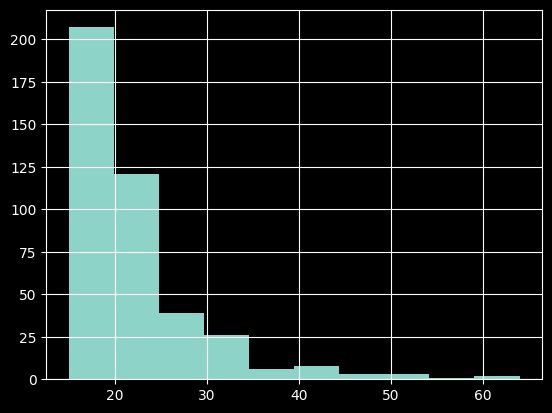

In [64]:
orders_more_15_not_auto[orders_more_15_not_auto['Статус'] == 'Успешно завершен']['Вес_заказа'].hist();

In [65]:
canceled = orders[orders['Статус'] == 'Отменен']

In [66]:
canceled[canceled['Готов'].notna()]['Успешно_завершен'].notna().mean()

0.366412213740458

In [67]:
canceled[canceled['Тип курьера'] == 'Вело Свой']

,Дата,час_оформления,Дата_поставки,ТТ,Тип_заказа,Подтип,Подтип_исх,Сервис,Тип сервиса,id_order,Статус,Строк_в_заказе,Позиций_в_заказе,Позиций_в_заказе_весовых,Оформлен,Печать_заказа_к_сбору,Готов,Доставка,Успешно_завершен,ID_курьера,Время_взятия_на_сборку,Время_сборки,Время_сборки_общ,Время_взятия_в_доставку,Время_доставки,Время_доставки_общ,Время_доставки_посл_сл,Время опоздания в мин,Время_заказа,ShopNo,Строк_собрано,Вес_заказа,Вес_заказа_по_id_general,id_parcel,Ячейка,Время_доставки_от,Время_доставки_до,Выбран_слот,id_general_new,Отменил заказ,Номер исходного заказа,id_general,suborder,Партнер,Тип_партнера,Номер_ПСЕ,Адрес_ПСЕ,Тип курьера,время_диапазон,slot_count
9768,2024-06-27,16,2024-06-27,4757ДС_Ленинградский80,Даркстор,ЗиЗ-11,ЗиЗ-11,Доставка за 1 час,ГОРОД,310539718,Отменен,2,2,0,2024-06-27 16:49:53.970,2024-06-27 16:51:52.670,2024-06-27 16:52:36.897,2024-06-27 16:56:00.023,2024-06-27 18:09:58.990,1.799923e+09,2.0,1.0,3.0,4.0,73.0,77.0,73.0,0,NaN,4757,3,0.373,0.373,NaN,CO-1-2,16:49,17:49,Нет,NaN,Лебедев Владислав Владимирович,NaN,310539718,1,NaN,NaN,NaN,NaN,Вело Свой,"(11.5, 17.25]",1.0
13886,2024-06-29,11,2024-06-29,4757ДС_Ленинградский80,Даркстор,ЗиЗ-14,ЗиЗ-14,Доставка сейчас,ГОРОД,311081661,Отменен,10,10,0,2024-06-29 11:01:43.620,2024-06-29 11:06:45.397,2024-06-29 11:13:32.627,2024-06-29 13:21:03.877,2024-06-29 13:23:24.097,1.799944e+09,NaN,4.0,NaN,19.0,111.0,130.0,111.0,0,NaN,4757,11,4.460,4.713,NaN,CO-3-2,11:09,13:09,Нет,NaN,Бобло Марина Михайловна,NaN,311081661,1,NaN,NaN,NaN,NaN,Вело Свой,"(5.75, 11.5]",1.0
17079,2024-06-30,17,2024-06-30,4757ДС_Ленинградский80,Даркстор,ЗиЗ-10,ЗиЗ-10,Доставка за 1 час,ГОРОД,311556222,Отменен,1,1,0,2024-06-30 17:45:28.930,NaT,NaT,NaT,NaT,1.799947e+09,35.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4757,1,0.100,NaN,NaN,NaN,17:45,18:45,Нет,NaN,Тарасова Дарья Александровна,NaN,311556221,2,ДИАЛОГ ЦЕНТР ООО,Аптека,99132.0,"Москва пр-т Ленинградский , д. 78 к. 1",Вело Свой,"(11.5, 17.25]",NaN
21738,2024-07-02,15,2024-07-02,4757ДС_Ленинградский80,Даркстор,ЗиЗ-06,ЗиЗ-06,Доставка за 1 час,ГОРОД,312267344,Отменен,1,1,0,2024-07-02 15:02:24.910,NaT,NaT,NaT,NaT,1.799943e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4757,1,0.780,NaN,NaN,NaN,15:02,16:02,Нет,312265592.0,Авто,NaN,312265592,2,NaN,NaN,NaN,NaN,Вело Свой,"(11.5, 17.25]",NaN
29662,2024-07-05,17,2024-07-05,4757ДС_Ленинградский80,Даркстор,ЗиЗ-11,ЗиЗ-11,Доставка за 1 час,ГОРОД,313532156,Отменен,6,6,1,2024-07-05 17:45:50.433,2024-07-05 17:46:47.470,2024-07-05 17:54:04.850,NaT,NaT,1.699924e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4757,6,2.300,2.653,NaN,NaN,17:56,18:56,Нет,NaN,Авто,NaN,313532156,1,NaN,NaN,NaN,NaN,Вело Свой,"(11.5, 17.25]",NaN
34622,2024-07-07,22,2024-07-07,4757ДС_Ленинградский80,Даркстор,ЗиЗ-11,ЗиЗ-11,Доставка за 1 час,ГОРОД,314244857,Отменен,6,6,0,2024-07-07 22:11:58.293,2024-07-07 22:25:21.687,2024-07-07 22:29:37.760,2024-07-07 22:30:37.453,2024-07-07 23:58:43.647,1.799923e+09,14.0,4.0,18.0,1.0,88.0,89.0,88.0,0,NaN,4757,7,10.618,10.618,NaN,CO-6-1,22:11,23:11,Нет,NaN,Голубева Дарья Олеговна,NaN,314244857,1,NaN,NaN,NaN,NaN,Вело Свой,"(17.25, 23.0]",1.0
35028,2024-07-06,12,2024-07-06,4757ДС_Ленинградский80,Даркстор,ЗиЗ-16,ЗиЗ-16,Экспресс доставка,Город экспресс,313745270,Отменен,5,5,0,2024-07-06 12:11:11.973,2024-07-06 12:11:51.120,2024-07-06 12:13:39.353,2024-07-06 12:16:24.823,2024-07-06 12:31:18.430,1.799923e+09,0.0,2.0,2.0,3.0,15.0,18.0,15.0,0,NaN,4757,6,1.534,1.534,NaN,CO-2-2,12:11,12:41,Нет,NaN,Кортунова Ирина Владимировна,NaN,313745270,1,NaN,NaN,NaN,NaN,Вело Свой,"(11.5, 17.25]",1.0
35514,2024-06-27,9,2024-06-27,4757ДС_Ленинградский80,Даркстор,ЗиЗ-14,ЗиЗ-14,Доставка сейчас,ГОРОД,310382077,Отменен,1,1,0,2024-06-27 09:38:39.820,2024-06-27 10:09:55.260,2024-06-27 10:10:41.187,2024-06-27 20:32:08.170,2024-06-28 00:15:16.727,1.799951e+09,NaN,NaN,NaN,NaN,195.0,NaN,195.0,0,NaN,4757,2,1.136,1.136,NaN,CO-3-3,21:00,22:00,Да,NaN,Cancelled by full refund,NaN,310382077,1,NaN,NaN,NaN,NaN,Вело Свой,"(5.75, 11.5]",1.0
36004,2024-06-29,10,2024-06-29,4757ДС_Лен

In [68]:
orders[orders['Статус'] == 'Отменен']['Отменил заказ'].value_counts()

Отменил заказ
Авто                             540
Cancelled by full refund          24
Тимофеева Ангелина Валерьевна      7
Агеева Валентина Дмитриевна        5
Евдокимов Андрей Сергеевич         5
                                ... 
Маклаков Кирилл Сергеевич          1
Шипицын Евгений Евгеньевич         1
Галицына Анастасия Алексеевна      1
Полонский Александр Игоревич       1
Лапшина Татьяна Олеговна           1
Name: count, Length: 96, dtype: int64

In [69]:
orders[orders['Статус'] == 'Вернулся на полки'][orders[orders['Статус'] == 'Вернулся на полки']['Тип курьера'] == 'Вело']

,Дата,час_оформления,Дата_поставки,ТТ,Тип_заказа,Подтип,Подтип_исх,Сервис,Тип сервиса,id_order,Статус,Строк_в_заказе,Позиций_в_заказе,Позиций_в_заказе_весовых,Оформлен,Печать_заказа_к_сбору,Готов,Доставка,Успешно_завершен,ID_курьера,Время_взятия_на_сборку,Время_сборки,Время_сборки_общ,Время_взятия_в_доставку,Время_доставки,Время_доставки_общ,Время_доставки_посл_сл,Время опоздания в мин,Время_заказа,ShopNo,Строк_собрано,Вес_заказа,Вес_заказа_по_id_general,id_parcel,Ячейка,Время_доставки_от,Время_доставки_до,Выбран_слот,id_general_new,Отменил заказ,Номер исходного заказа,id_general,suborder,Партнер,Тип_партнера,Номер_ПСЕ,Адрес_ПСЕ,Тип курьера,время_диапазон,slot_count
4523,2024-06-25,16,2024-06-25,4757ДС_Ленинградский80,Даркстор,ЗиЗ-04,ЗиЗ-04,Доставка за 1 час,ГОРОД,309800006,Вернулся на полки,1,1,0,2024-06-25 16:42:35.820,2024-06-25 16:43:55.537,2024-06-25 16:45:13.580,2024-06-25 16:56:35.367,NaT,1.699872e+09,1.0,2.0,3.0,NaN,NaN,NaN,NaN,0,NaN,4757,2,1.403,NaN,NaN,NaN,16:42,17:42,Нет,309799854.0,NaN,NaN,309799854,2,NaN,NaN,NaN,NaN,Вело,"(11.5, 17.25]",NaN
32241,2024-07-06,21,2024-07-06,4757ДС_Ленинградский80,Даркстор,ЗиЗ-01,ЗиЗ-01,Доставка за 1 час,ГОРОД,313919315,Вернулся на полки,1,1,0,2024-07-06 21:59:28.400,2024-07-06 21:59:49.910,2024-07-06 22:00:12.323,2024-07-06 22:04:15.910,NaT,1.799956e+09,0.0,1.0,1.0,NaN,NaN,NaN,NaN,0,NaN,4757,2,2.003,NaN,NaN,NaN,21:59,22:59,Нет,313918216.0,NaN,NaN,313918216,2,NaN,NaN,NaN,NaN,Вело,"(17.25, 23.0]",NaN
33786,2024-07-07,16,2024-07-07,4757ДС_Ленинградский80,Даркстор,ЗиЗ-01,ЗиЗ-04,Доставка за 1 час,ГОРОД,314151025,Вернулся на полки,22,22,0,2024-07-07 16:58:59.020,2024-07-07 17:02:02.257,2024-07-07 17:12:30.157,2024-07-07 19:32:13.347,NaT,1.699889e+09,4.0,10.0,14.0,NaN,NaN,NaN,15.0,108,NaN,4757,23,7.513,8.966,NaN,CZ-2-3;CO-2-3,16:58,17:58,Нет,NaN,NaN,NaN,314151025,1,NaN,NaN,NaN,NaN,Вело,"(11.5, 17.25]",2.0


In [70]:
orders[orders['Статус'] == 'Не выполнен']

,Дата,час_оформления,Дата_поставки,ТТ,Тип_заказа,Подтип,Подтип_исх,Сервис,Тип сервиса,id_order,Статус,Строк_в_заказе,Позиций_в_заказе,Позиций_в_заказе_весовых,Оформлен,Печать_заказа_к_сбору,Готов,Доставка,Успешно_завершен,ID_курьера,Время_взятия_на_сборку,Время_сборки,Время_сборки_общ,Время_взятия_в_доставку,Время_доставки,Время_доставки_общ,Время_доставки_посл_сл,Время опоздания в мин,Время_заказа,ShopNo,Строк_собрано,Вес_заказа,Вес_заказа_по_id_general,id_parcel,Ячейка,Время_доставки_от,Время_доставки_до,Выбран_слот,id_general_new,Отменил заказ,Номер исходного заказа,id_general,suborder,Партнер,Тип_партнера,Номер_ПСЕ,Адрес_ПСЕ,Тип курьера,время_диапазон,slot_count
5300,2024-06-25,21,2024-06-26,4757ДС_Ленинградский80,Даркстор,ЗиЗ-10,ЗиЗ-10,Доставка за 1 час,ГОРОД,309898604,Не выполнен,1,1,0,2024-06-25 21:57:47.257,2024-06-25 21:58:06.830,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4757,1,0.300,0.300,NaN,NaN,00:00,01:00,Да,NaN,NaN,NaN,309898604,1,NaN,NaN,NaN,NaN,NaN,"(17.25, 23.0]",NaN
13980,2024-06-29,11,2024-06-29,4757ДС_Ленинградский80,Даркстор,ЗиЗ-07,ЗиЗ-07,Доставка за 1 час,ГОРОД,311096572,Не выполнен,1,1,1,2024-06-29 11:37:39.027,2024-06-29 11:44:26.587,NaT,NaT,NaT,1.799954e+09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4757,1,0.820,2.950,NaN,NaN,11:43,12:43,Нет,NaN,NaN,NaN,311096572,1,NaN,NaN,NaN,NaN,Авто,"(5.75, 11.5]",NaN
15943,2024-06-30,10,2024-06-30,4757ДС_Ленинградский80,Даркстор,ЗиЗ-01,ЗиЗ-01,Доставка за 1 час,ГОРОД,311386851,Не выполнен,1,1,0,2024-06-30 10:37:41.517,2024-06-30 10:39:40.810,NaT,NaT,NaT,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4757,1,1.200,1.200,NaN,NaN,10:37,11:37,Нет,NaN,NaN,NaN,311386851,1,NaN,NaN,NaN,NaN,NaN,"(5.75, 11.5]",NaN
32873,2024-07-07,10,2024-07-07,4757ДС_Ленинградский80,Даркстор,ЗиЗ-12,ЗиЗ-12,Доставка за 1 час,ГОРОД,314012326,Не выполнен,1,1,0,2024-07-07 10:46:36.233,2024-07-07 10:47:04.943,NaT,NaT,NaT,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4757,1,10.000,10.000,NaN,NaN,10:46,11:46,Нет,NaN,NaN,NaN,314012326,1,NaN,NaN,NaN,NaN,NaN,"(5.75, 11.5]",NaN
35759,2024-06-25,17,2024-06-25,4757ДС_Ленинградский80,Даркстор,ЗиЗ-01,ЗиЗ-01,Доставка за 1 час,ГОРОД,309820819,Не выполнен,1,1,0,2024-06-25 17:49:31.860,2024-06-25 17:52:57.593,NaT,NaT,NaT,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4757,1,0.080,0.080,NaN,NaN,17:49,18:49,Нет,NaN,NaN,NaN,309820819,1,NaN,NaN,NaN,NaN,NaN,"(11.5, 17.25]",NaN
35837,2024-07-03,10,2024-07-03,4757ДС_Ленинградский80,Даркстор,ЗиЗ-01,ЗиЗ-01,Доставка за 1 час,ГОРОД,312570548,Не выполнен,3,3,1,2024-07-03 10:10:17.940,2024-07-03 10:11:10.343,NaT,NaT,NaT,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4757,3,0.965,0.965,NaN,NaN,10:10,11:10,Нет,NaN,NaN,NaN,312570548,1,NaN,NaN,NaN,NaN,NaN,"(5.75, 11.5]",NaN


### Pool

In [71]:
pool.head()

,id_pool,sort_order,id_courier,id_job,date_start,date_add,id_parcel,date_delivered,id_general,distance,duration,shopNo,gettype,gettype_name,name_TT,id_service,name_service
0,46154558,6,1799953518,312682133,2024-06-24 10:06:42.080,2024-06-24 10:25:13.340,308931733,2024-06-24 10:25:13.337,308931733,1.632,236,4757,4,ЗиЗ-01,4757ДС_Ленинградский80,32,Доставка за 1 час
1,46146532,3,1799909155,312635798,2024-06-24 06:03:53.357,2024-06-24 06:14:53.657,308992143,2024-06-24 06:14:53.657,308992143,1.362,308,4757,54,ЗиЗ-06,4757ДС_Ленинградский80,32,Доставка за 1 час
2,46153107,2,1799951221,312661707,2024-06-24 09:33:44.057,2024-06-24 09:36:18.470,308995916,2024-06-24 09:36:18.470,308995916,1.290,481,4757,65,ЗиЗ-11,4757ДС_Ленинградский80,32,Доставка за 1 час
3,46164620,2,1799922610,312731104,2024-06-24 11:56:00.450,2024-06-24 11:55:22.457,308996805,2024-06-24 11:55:22.457,308996805,0.987,157,4757,65,ЗиЗ-11,4757ДС_Ленинградский80,32,Доставка за 1 час
4,46153107,2,1799951221,312661707,2024-06-24 09:33:44.057,2024-06-24 09:36:18.470,308995916,2024-06-24 09:36:18.470,308995916,1.290,481,4757,65,ЗиЗ-11,4757ДС_Ленинградский80,32,Доставка за 1 час


In [72]:
pool.describe().T

,count,mean,min,25%,50%,75%,max,std
id_pool,36560.0,46623711.425082,46143976.0,46374990.0,46616490.0,46877360.0,47134265.0,287835.1864
sort_order,36560.0,3.478474,1.0,2.0,3.0,5.0,12.0,1.950557
id_courier,36560.0,1772815207.962719,978993874.0,1799907471.0,1799947346.0,1799953281.0,1799955922.0,79383811.236297
id_job,36560.0,314930777.770596,312624790.0,313754273.25,314863130.5,316190353.25,317384818.0,1390622.580293
date_start,36560,2024-06-30 21:25:49.575441152,2024-06-24 00:01:09.443000,2024-06-27 10:47:19.698250240,2024-06-30 19:23:13.648000,2024-07-04 10:55:40.400250112,2024-07-07 23:54:37.290000,NaN
date_add,36560,2024-06-30 21:30:35.693013504,2024-06-24 00:01:23.607000,2024-06-27 10:51:45.240249856,2024-06-30 19:28:16.973500160,2024-07-04 11:00:55.347000064,2024-07-08 00:11:09.060000,NaN
id_parcel,36560.0,311639068.384218,308931733.0,310384559.5,311570554.0,312987567.25,314254870.0,1482710.517615
date_delivered,36560,2024-06-30 21:30:35.690942976,2024-06-24 00:01:23.607000,2024-06-27 10:51:45.237250048,2024-06-30 19:28:16.973500160,2024-07-04 11:00:55.343000064,2024-07-08 00:11:09.057000,NaN
id_general,36560.0,311639068.384218,308931733.0,310384559.5,311570554.0,312987567.25,314254870.0,1482710.517615
distance,36560.0,2.035186,0.0,0.455,0.94,1.803,544.288025,18.519972


In [73]:
orders[orders['slot_count'] > 2]['id_general']

25       309190099
63       309195376
155      309204905
166      309206376
193      309210407
           ...    
37218    311539723
37241    309207855
37441    312126279
37461    310394610
37562    310517687
Name: id_general, Length: 514, dtype: int64

In [74]:
pool[pool['id_general'] == 310394610]

,id_pool,sort_order,id_courier,id_job,date_start,date_add,id_parcel,date_delivered,id_general,distance,duration,shopNo,gettype,gettype_name,name_TT,id_service,name_service
9215,46375346,7,1699931177,313756900,2024-06-27 11:00:05.650,2024-06-27 11:01:33.837,310394610,2024-06-27 11:01:33.837,310394610,1.13,149,4757,4,ЗиЗ-01,4757ДС_Ленинградский80,32,Доставка за 1 час


In [75]:
pool['id_service'].value_counts()

id_service
32    30601
1      3445
78     1590
6       654
62      180
49       90
Name: count, dtype: int64

In [76]:
pool.groupby('id_general').filter(lambda x: len(x) > 4)

,id_pool,sort_order,id_courier,id_job,date_start,date_add,id_parcel,date_delivered,id_general,distance,duration,shopNo,gettype,gettype_name,name_TT,id_service,name_service
2582,46268493,6,1799909514,313238375,2024-06-25 19:14:26.440,2024-06-25 19:16:23.083,309475535,2024-06-25 19:16:23.083,309475535,0.486,329,4757,54,ЗиЗ-06,4757ДС_Ленинградский80,32,Доставка за 1 час
2654,46268493,6,1799909514,313238375,2024-06-25 19:14:26.440,2024-06-25 19:16:23.083,309475535,2024-06-25 19:16:23.083,309475535,0.486,329,4757,54,ЗиЗ-06,4757ДС_Ленинградский80,32,Доставка за 1 час
2733,46268493,6,1799909514,313238375,2024-06-25 19:14:26.440,2024-06-25 19:16:23.083,309475535,2024-06-25 19:16:23.083,309475535,0.486,329,4757,54,ЗиЗ-06,4757ДС_Ленинградский80,32,Доставка за 1 час
2978,46268493,6,1799909514,313238375,2024-06-25 19:14:26.440,2024-06-25 19:16:23.083,309475535,2024-06-25 19:16:23.083,309475535,0.486,329,4757,54,ЗиЗ-06,4757ДС_Ленинградский80,32,Доставка за 1 час
2980,46268493,6,1799909514,313238375,2024-06-25 19:14:26.440,2024-06-25 19:16:23.083,309475535,2024-06-25 19:16:23.083,309475535,0.486,329,4757,54,ЗиЗ-06,4757ДС_Ленинградский80,32,Доставка за 1 час
3041,46239100,3,1799953518,313105837,2024-06-25 12:06:31.100,2024-06-25 12:08:55.850,309529526,2024-06-25 12:08:55.850,309529526,1.725,215,4757,4,ЗиЗ-01,4757ДС_Ленинградский80,32,Доставка за 1 час
3456,46239100,3,1799953518,313105837,2024-06-25 12:06:31.100,2024-06-25 12:08:55.850,309529526,2024-06-25 12:08:55.850,309529526,1.725,215,4757,4,ЗиЗ-01,4757ДС_Ленинградский80,32,Доставка за 1 час
3508,46239100,3,1799953518,313105837,2024-06-25 12:06:31.100,2024-06-25 12:08:55.850,309529526,2024-06-25 12:08:55.850,309529526,1.725,215,4757,4,ЗиЗ-01,4757ДС_Ленинградский80,32,Доставка за 1 час
3596,46239100,3,1799953518,313105837,2024-06-25 12:06:31.100,2024-06-25 12:08:55.850,309529526,2024-06-25 12:08:55.850,309529526,1.725,215,4757,4,ЗиЗ-01,4757ДС_Ленинградский80,32,Доставка за 1 час
3809,46239100,3,1799953518,313105837,2024-06-25 12:06:31.100,2024-06-25 12:08:55.850,309529526,2024-06-25 12:08:55.850,309529526,1.725,215,4757,4,ЗиЗ-01,4757ДС_Ленинградский80,32,Доставка за 1 час


In [77]:
pool[pool['id_general'] == 310998476]

,id_pool,sort_order,id_courier,id_job,date_start,date_add,id_parcel,date_delivered,id_general,distance,duration,shopNo,gettype,gettype_name,name_TT,id_service,name_service
14142,46516207,3,1799953570,314397463,2024-06-29 11:40:59.680,2024-06-29 11:45:39.367,310998476,2024-06-29 11:45:39.363,310998476,1.536,314,4757,69,ЗиЗ-15,4757ДС_Ленинградский80,78,Доставка за 30 минут
14143,46516207,3,1799953570,314397463,2024-06-29 11:40:59.680,2024-06-29 11:45:39.367,310998476,2024-06-29 11:45:39.363,310998476,1.536,314,4757,69,ЗиЗ-15,4757ДС_Ленинградский80,78,Доставка за 30 минут
14158,46516207,3,1799953570,314397463,2024-06-29 11:40:59.680,2024-06-29 11:45:39.367,310998476,2024-06-29 11:45:39.363,310998476,1.536,314,4757,69,ЗиЗ-15,4757ДС_Ленинградский80,78,Доставка за 30 минут
14160,46516207,3,1799953570,314397463,2024-06-29 11:40:59.680,2024-06-29 11:45:39.367,310998476,2024-06-29 11:45:39.363,310998476,1.536,314,4757,69,ЗиЗ-15,4757ДС_Ленинградский80,78,Доставка за 30 минут
14162,46516207,3,1799953570,314397463,2024-06-29 11:40:59.680,2024-06-29 11:45:39.367,310998476,2024-06-29 11:45:39.363,310998476,1.536,314,4757,69,ЗиЗ-15,4757ДС_Ленинградский80,78,Доставка за 30 минут
14163,46516207,3,1799953570,314397463,2024-06-29 11:40:59.680,2024-06-29 11:45:39.367,310998476,2024-06-29 11:45:39.363,310998476,1.536,314,4757,69,ЗиЗ-15,4757ДС_Ленинградский80,78,Доставка за 30 минут
14167,46516207,3,1799953570,314397463,2024-06-29 11:40:59.680,2024-06-29 11:45:39.367,310998476,2024-06-29 11:45:39.363,310998476,1.536,314,4757,69,ЗиЗ-15,4757ДС_Ленинградский80,78,Доставка за 30 минут


In [78]:
orders[orders['id_general'] == 309475535]['Позиций_в_заказе']

2361    1
2430    1
2503    2
2742    1
2744    1
Name: Позиций_в_заказе, dtype: int64

#### Bag counts

In [79]:
o = orders[['id_general', 'Вес_заказа', 'Позиций_в_заказе', 'Позиций_в_заказе_весовых', 'Оформлен', 'Тип курьера']]

In [80]:
p = pool[['id_general', 'id_parcel', 'distance']]

In [81]:
po = pd.merge(p,o, on='id_general', how='left')

In [82]:
po.isna().mean()

id_general                  0.000000
id_parcel                   0.000000
distance                    0.000000
Вес_заказа                  0.002748
Позиций_в_заказе            0.002748
Позиций_в_заказе_весовых    0.002748
Оформлен                    0.002748
Тип курьера                 0.003000
dtype: float64

In [83]:
po = po.dropna()

In [84]:
po

,id_general,id_parcel,distance,Вес_заказа,Позиций_в_заказе,Позиций_в_заказе_весовых,Оформлен,Тип курьера
6,309018554,309018554,4.503,1.463,3.0,1.0,2024-06-24 01:13:23.507,Авто
7,309018554,309018554,4.503,0.925,3.0,0.0,2024-06-24 01:27:49.397,Авто
8,309018554,309018554,4.503,0.673,2.0,0.0,2024-06-24 06:53:36.520,Авто
18,309099293,309099293,0.207,3.808,4.0,1.0,2024-06-24 10:35:43.487,Авто
19,309099293,309099293,0.207,1.570,1.0,1.0,2024-06-24 11:21:49.957,Авто
...,...,...,...,...,...,...,...,...
39666,314251581,314251581,0.353,6.823,4.0,0.0,2024-07-07 22:59:46.200,Вело Свой
39667,314252453,314252453,0.311,10.142,5.0,0.0,2024-07-07 23:07:43.620,Вело Свой
39668,314253163,314253163,3.852,3.353,2.0,0.0,2024-07-07 23:14:34.617,Ночной Вело Курьер
39669,314253207,314253207,1.778,1.250,4.0,2.0,2024-07-07 23:15:03.990,Авто


In [85]:
po_grouped = po.groupby('id_general').agg(
time_order=('Оформлен', 'min'),
    count_bags=('id_parcel', 'count'),
    total_weight=('Вес_заказа', 'sum'),
    median_distance=('distance', 'median'),
    count_items=('Позиций_в_заказе', 'sum'),
    count_items_weight=('Позиций_в_заказе_весовых', 'sum'),
    courier_type=('Тип курьера', 'max'))

In [86]:
po_grouped.reset_index(inplace=True)

In [87]:
po_grouped.isna().mean()

id_general            0.0
time_order            0.0
count_bags            0.0
total_weight          0.0
median_distance       0.0
count_items           0.0
count_items_weight    0.0
courier_type          0.0
dtype: float64

##### po

In [88]:
po.head(10)

,id_general,id_parcel,distance,Вес_заказа,Позиций_в_заказе,Позиций_в_заказе_весовых,Оформлен,Тип курьера
6,309018554,309018554,4.503,1.463,3.0,1.0,2024-06-24 01:13:23.507,Авто
7,309018554,309018554,4.503,0.925,3.0,0.0,2024-06-24 01:27:49.397,Авто
8,309018554,309018554,4.503,0.673,2.0,0.0,2024-06-24 06:53:36.520,Авто
18,309099293,309099293,0.207,3.808,4.0,1.0,2024-06-24 10:35:43.487,Авто
19,309099293,309099293,0.207,1.570,1.0,1.0,2024-06-24 11:21:49.957,Авто
20,309099293,309099293,0.207,2.608,6.0,1.0,2024-06-24 02:52:35.660,Авто
58,309181038,309181038,1.737,0.770,3.0,0.0,2024-06-24 00:11:50.057,Авто
59,309181257,309181257,1.010,0.090,1.0,0.0,2024-06-24 00:24:17.093,Вело
83,309185473,309185473,0.320,1.033,5.0,0.0,2024-06-24 01:45:25.263,Авто
91,309186503,309186503,4.052,2.921,4.0,1.0,2024-06-24 00:01:39.340,Вело Свой


In [89]:
po['count_bags'].value_counts()

KeyError: 'count_bags'

In [ ]:
po['count_items_weight'].value_counts()

In [ ]:
po.groupby('courier_type')['total_weight'].agg(['count', 'mean', 'median'])

In [ ]:
po.groupby('courier_type')['count_bags'].agg(['count', 'mean', 'median'])

In [ ]:
po.groupby('courier_type')['count_items'].median()

##### corr

Выявить корреляции между признаками, особенно между количеством пакетов, весом и дистанцией, чтобы понять, какие из них наиболее связаны.

In [90]:
po_grouped.columns

Index(['id_general', 'time_order', 'count_bags', 'total_weight',
       'median_distance', 'count_items', 'count_items_weight', 'courier_type'],
      dtype='object')

In [91]:
num_col = ['id_general', 'time_order', 'count_bags', 'total_weight',
       'median_distance', 'count_items', 'count_items_weight']

In [92]:
po_grouped[num_col].corr()

,id_general,time_order,count_bags,total_weight,median_distance,count_items,count_items_weight
id_general,1.000000,0.999323,-0.004729,0.037480,-0.023276,0.016417,0.024484
time_order,0.999323,1.000000,-0.004752,0.037770,-0.023641,0.016561,0.025050
count_bags,-0.004729,-0.004752,1.000000,0.252665,0.058760,0.422036,0.178987
total_weight,0.037480,0.037770,0.252665,1.000000,-0.016405,0.529466,0.379535
median_distance,-0.023276,-0.023641,0.058760,-0.016405,1.000000,-0.015015,0.031519
count_items,0.016417,0.016561,0.422036,0.529466,-0.015015,1.000000,0.537004
count_items_weight,0.024484,0.025050,0.178987,0.379535,0.031519,0.537004,1.000000


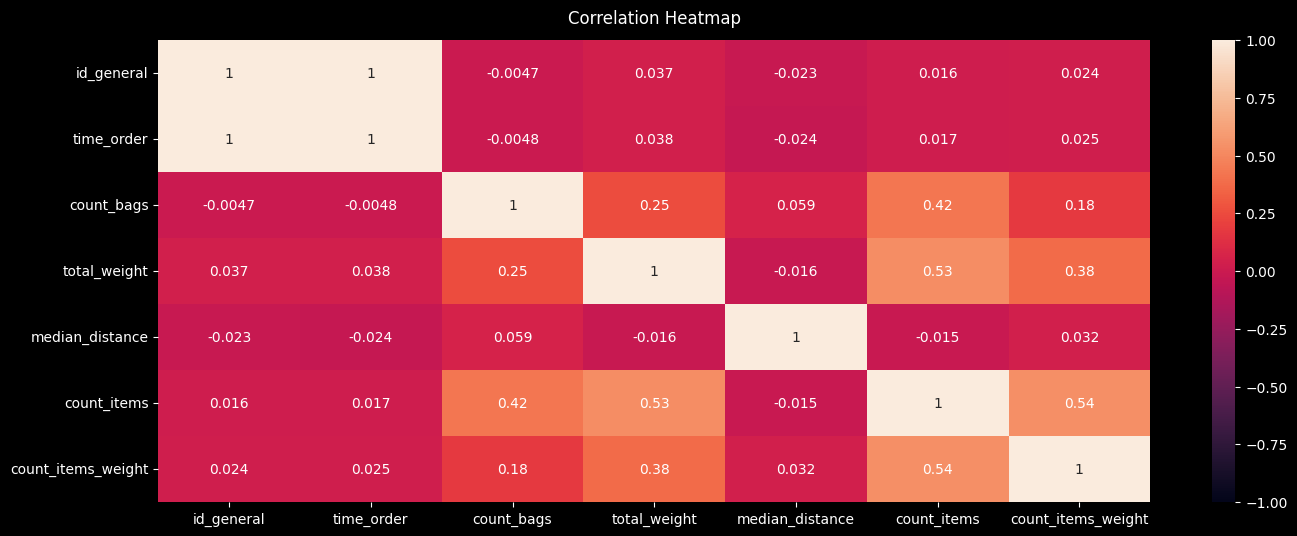

In [93]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(po_grouped[num_col].corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Есть слабая корреляция между количеством пакетов в заказе и общим весом заказа, и есть умеренная корреляция между количеством пакетов и количеством позиций в заказе 

##### analysis time

    Анализ временных закономерностей
- Исследовать, как количество пакетов, вес и дистанция изменяются в зависимости от времени заказа. Например, больше ли заказов в определенные часы дня или дни недели?
- Определить пиковые часы для различных типов курьеров.

In [94]:
po_grouped.set_index('time_order', inplace=True)

In [95]:
po_grouped.index.is_monotonic_increasing

False

In [96]:
po_grouped.sort_index(inplace=True)

In [97]:
po_grouped.index.is_monotonic_increasing

True

In [98]:
po_grouped_hour = po_grouped.resample('1H').agg({
    'count_bags': 'sum',
    'total_weight': 'sum',
    'median_distance': 'mean'  # или можно использовать 'median'
}).fillna(0)

/tmp/ipykernel_94111/3652152487.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  po_grouped_hour = po_grouped.resample('1H').agg({


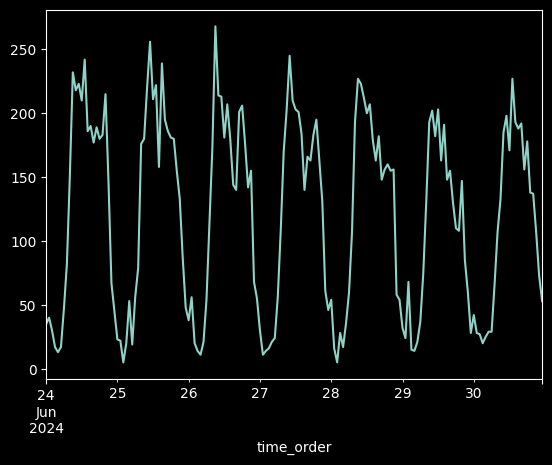

In [99]:
po_grouped_hour[po_grouped_hour.index < '2024-07-01 00:00:00']['count_bags'].plot();

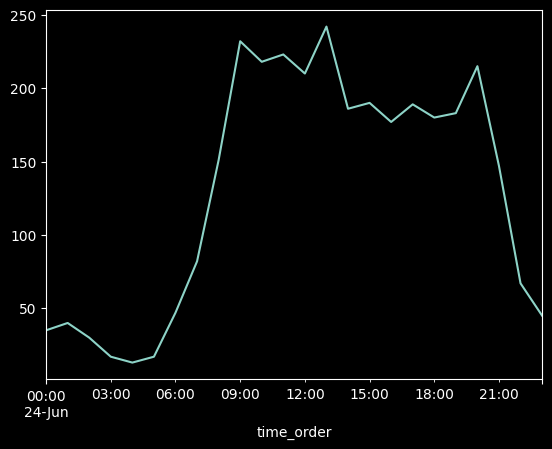

In [102]:
po_grouped_hour[po_grouped_hour.index < '2024-06-25 00:00:00']['count_bags'].plot();

In [ ]:
    C 6 утра начинается рост количеста заказанных пакетов также как и количество заказов. В среднем количество пакетов не растет от времени заказа

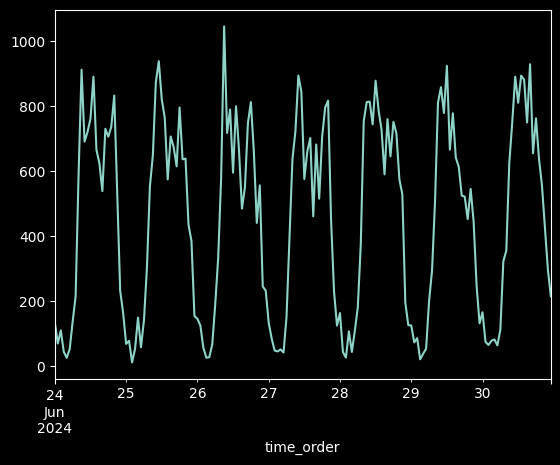

In [100]:
po_grouped_hour[po_grouped_hour.index < '2024-07-01 00:00:00']['total_weight'].plot();

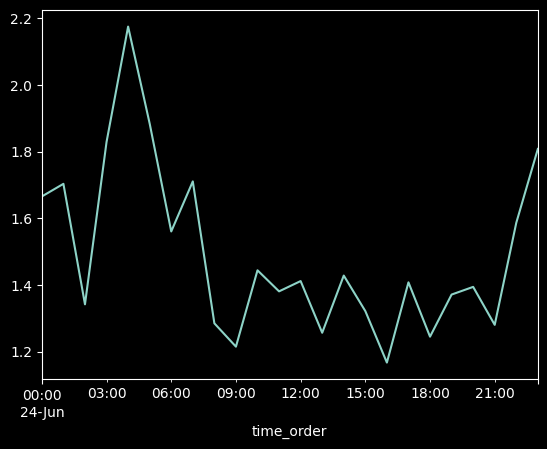

In [101]:
po_grouped_hour[po_grouped_hour.index < '2024-07-01 00:00:00']['median_distance'].plot();

##### analisys by couriers type

    Анализ по типам курьеров
- Сравнить разные типы курьеров (например, пеший, велосипед, автомобиль) по различным метрикам: среднее количество пакетов, средний вес, дистанция.
- Выдвинуть гипотезу о том, какие типы курьеров более эффективны для определенных типов заказов.

In [88]:
po_grouped

,id_general,count_bags,total_weight,median_distance,count_items,count_items_weight,courier_type
time_order,,,,,,,
2024-06-24 00:01:39.340,309186503,1,2.921,4.052000,4.0,1.0,Вело Свой
2024-06-24 00:03:33.527,309186672,1,1.412,1.884000,5.0,0.0,Вело
2024-06-24 00:04:08.853,309186723,1,0.560,4.558000,3.0,0.0,Ночной Вело Курьер
2024-06-24 00:09:38.990,309187221,1,5.623,0.006494,3.0,0.0,Авто
2024-06-24 00:09:39.003,309187220,1,1.333,0.425000,4.0,0.0,Авто
...,...,...,...,...,...,...,...
2024-07-07 22:59:46.200,314251581,1,6.823,0.353000,4.0,0.0,Вело Свой
2024-07-07 23:07:43.620,314252453,1,10.142,0.311000,5.0,0.0,Вело Свой
2024-07-07 23:14:34.617,314253163,1,3.353,3.852000,2.0,0.0,Ночной Вело Курьер


In [103]:
po_grouped.groupby("courier_type").agg({'id_general': 'count',
                                        'count_bags': 'mean',
                                        'total_weight': 'mean',
                                        'median_distance': 'median',
                                        'count_items': 'median',
                                        'count_items_weight': 'mean'})

,id_general,count_bags,total_weight,median_distance,count_items,count_items_weight
courier_type,,,,,,
Авто,23424,1.147328,4.426981,0.9335,5.0,0.859674
Вело,4941,1.132159,4.501451,0.9100,5.0,0.872495
Вело Свой,4564,1.129930,4.499724,0.8490,5.0,0.846407
Мобильный Авто Курьер,176,1.181818,3.286756,1.4065,4.0,0.460227
Ночной Вело Курьер,1496,1.148396,4.418961,1.3835,5.0,0.662433


Большая часть заказов доставляется автокурьерами. В среднем нет разницы в количчестве пакетов, весе заказа, расстоянием заказа, между заказами которые доставляет авто или вело курьер 

##### Analysis distance

    Анализ дистанции
- Исследовать влияние дистанции на вес и количество пакетов. Например, доставляют ли курьеры на более длинные дистанции более легкие заказы?
- Выявить оптимальные маршруты или районы с наибольшей плотностью заказов.

##### Analysis weight

    Анализ веса заказов
- Исследовать влияние общего веса заказа на тип курьера и дистанцию. Например, выбирают ли для тяжелых заказов определенные типы курьеров или для таких заказов характерны меньшие дистанции?

##### Klastering

    Сегментация заказов
- Сегментировать заказы по количеству пакетов, весу, дистанции и типу курьера, чтобы выявить типичные паттерны или группы заказов.
- Определить, какие сегменты являются наиболее частыми и что их характеризует.